<a href="https://colab.research.google.com/github/Suraj-7077/Supervised-ML-regression-Bike-sharing-demand-prediction-capstone-project-II/blob/main/Supervised_ML_Regression_Capstone_Project_II_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



Project Type - EDA/Regression

Project Title - Bike Sharing Demand Prediction

Contribution - Individual

Name - Suraj Shrikant Galande

# **Project Summary -**

 

*  The goal of this project is to combine the historical bike usage patterns with the weather data in order to forecast bike rental demand.

*   The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.



# **Problem Statement**


#### Business Objective :-

### Currently rental bikes are introduced in many urban cities for enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. eventually, providing the city with stable supply of rental bikes becomes a major concern. ***The crucial part of this project is the prediction of bike count required at each hour for the stable supply of rental bikes. ***

#Dataset Description 



🔶Date   :- year-month-day

🔶Rented Bike count    :- Count of bikes rented at each hour

🔶Hour :- Hour of he day (0 to 23)

🔶Temperature :-Temperature of the day in degree celsius

🔶Humidity  :- Humidity measurement in %

🔶Windspeed  :- windspeed in m/s

🔶Visibility  :-Visibility measurement around 10meter

🔶Dew point temperature :- Dew point measurement in degree Celsius

🔶Solar radiation :- Solar radiation measureent in MJ/m2 (i.e. Megajules per meter square)

🔶Rainfall :- Rainfall measurement in mm

🔶Snowfall :- Snowfall measurement in cm

🔶Seasons :- Winter, Spring, Summer, Fall or Autumn

🔶Holiday :- Holiday/No holiday

🔶Functional Day :- No Func(Non Functional Hours), Fun(Functional hours)   



Now performing EDA on Seoul Bike data set and learn how this dataset gives prediction about rented bike count.

#EDA

### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ridge_regression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

###Importing Dataset

In [2]:
path = '/content/drive/MyDrive/ Capstone project/Supervised ML Regression Capstone/SeoulBikeData.csv'

In [3]:
bike_df = pd.read_csv(path, encoding= 'unicode_escape', parse_dates=[0])

### Dataset View

In [4]:
# looking first five records of dataframe

bike_df.head()             

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
bike_df.shape

(8760, 14)

---> As we see that there are 8760 records or Rows and 14 features or Columns present in dataset

In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

---> **As we see that **

1) **one feature is in Date time Data type**

2) **four features are in integer Data type**

**3) six features are in float Data type**

**4**) **three features are in object Data type format**

**Numerical features **:- Rented Bike Count,  Hour ,  Temperatures,  Humidity,  Wind Speed,  Visibility,  Dew point Temperatures,  solar radiation,  rainfall, and snowfall.

**Categorical features** :- Season,  Holliday,  Functioning day


**Target or Dependent Variable  --- Rented Bike Count

**Input or Independent Variables** --- Date,  Hour , Temperatures, Humidity, Wind Speed, Visibility, Dew point Temperatures, solar radiation, rainfall, snowfall, Season, Holliday, Functioning day.

In [7]:
# description of numerical variables and catagorical variables
bike_df.describe(include='all').T                    # T is for transpose 

count unique                  top  freq  \
Date                         8760    365  2017-01-12 00:00:00    24   
Rented Bike Count          8760.0    NaN                  NaN   NaN   
Hour                       8760.0    NaN                  NaN   NaN   
Temperature(°C)            8760.0    NaN                  NaN   NaN   
Humidity(%)                8760.0    NaN                  NaN   NaN   
Wind speed (m/s)           8760.0    NaN                  NaN   NaN   
Visibility (10m)           8760.0    NaN                  NaN   NaN   
Dew point temperature(°C)  8760.0    NaN                  NaN   NaN   
Solar Radiation (MJ/m2)    8760.0    NaN                  NaN   NaN   
Rainfall(mm)               8760.0    NaN                  NaN   NaN   
Snowfall (cm)              8760.0    NaN                  NaN   NaN   
Seasons                      8760      4               Spring  2208   
Holiday                      8760      2           No Holiday  8328   
Functioning Day              8760      2                  Yes  8465   

                               first       last         mean         std  \
Date                      2017-01-12 2018-12-11          NaN         NaN   
Rented Bike Count                NaT        NaT   704.602055  644.997468   
Hour                             NaT        NaT         11.5    6.922582   
Temperature(°C)                  NaT        NaT    12.882922   11.944825   
Humidity(%)                      NaT        NaT    58.226256   20.362413   
Wind speed (m/s)                 NaT        NaT     1.724909      1.0363   
Visibility (10m)                 NaT        NaT  1436.825799  608.298712   
Dew point temperature(°C)        NaT        NaT     4.073813   13.060369   
Solar Radiation (MJ/m2)          NaT        NaT     0.569111    0.868746   
Rainfall(mm)                     NaT        NaT     0.148687    1.128193   
Snowfall (cm)                    NaT        NaT     0.075068    0.436746   
Seasons                          NaT        NaT          NaN         NaN   
Holiday                          NaT        NaT          NaN         NaN   
Functioning Day                  NaT        NaT          NaN         NaN   

                            min    25%     50%      75%     max  
Date                        NaN    NaN     NaN      NaN     NaN  
Rented Bike Count           0.0  191.0   504.5  1065.25  3556.0  
Hour                        0.0   5.75    11.5    17.25    23.0  
Temperature(°C)           -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)            0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C) -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)     0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)               0.0    0.0     0.0      0.0     8.8  
Seasons                     NaN    NaN     NaN      NaN     NaN  
Holiday                     NaN    NaN     NaN      NaN     NaN  
Functioning Day             NaN    NaN     NaN      NaN     NaN

---> **This displays summary of statistics of dataframe**

**Information of different descriptive statistics** :-

1) **Measures of Frequency** :- Count, Percent, Frequency.

2) **Measures of Central Tendency** :- Mean, Median, and Mode.

3)** Measures of Dispersion or Variation or spread** :- Range( max - min ),Variance, Standard Deviation.

4) **Measures of Position** :- Percentile Ranks, Quartile Ranks.

# Preprocessing The Data

### Checking for Missing values

In [8]:
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
# Percentage of missing values in each features

print(bike_df.isnull().sum()/len(bike_df) * 100)
pd.options.display.float_format = '{:,.2f} %'.format              # 0.2f is for percentage up to 2 decimal  

Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64


---> **As we can see that in our Seoul Bike data set features has no null values present**. **so we dont need to treat missing values**.

### Checking for number of unique or distinct values in all attributes or columns 


In [10]:
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

---> **This shows different number of distinct values in perticluar columns**

###Checking For duplicate values present in dataset 

In [11]:
bike_df.duplicated().sum()

0

---> **hence no duplicated values present in features so no need to perform duplication removel operation**

In [12]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

###Converting Date column in seperate Year , Month , Day columns for better understanding.

In [13]:
bike_df['year'] = bike_df['Date'].map(lambda x: x.year).astype('object')        # extracting year from Date column
bike_df['month'] = bike_df['Date'].dt.month_name()                              # extracting month from date column
bike_df['day'] = bike_df['Date'].dt.day_name()                                  # extracting day from date column

In [14]:
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0          -5.20 %           37   
1 2017-01-12                204     1          -5.50 %           38   
2 2017-01-12                173     2          -6.00 %           39   
3 2017-01-12                107     3          -6.20 %           40   
4 2017-01-12                 78     4          -6.00 %           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0            2.20 %              2000                   -17.60 %   
1            0.80 %              2000                   -17.60 %   
2            1.00 %              2000                   -17.70 %   
3            0.90 %              2000                   -17.60 %   
4            2.30 %              2000                   -18.60 %   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                   0.00 %        0.00 %         0.00 %  Winter  No Holiday   
1                   0.00 %        0.00 %         0.00 %  Winter  No Holiday   
2                   0.00 %        0.00 %         0.00 %  Winter  No Holiday   
3                   0.00 %        0.00 %         0.00 %  Winter  No Holiday   
4                   0.00 %        0.00 %         0.00 %  Winter  No Holiday   

  Functioning Day  year    month       day  
0             Yes  2017  January  Thursday  
1             Yes  2017  January  Thursday  
2             Yes  2017  January  Thursday  
3             Yes  2017  January  Thursday  
4             Yes  2017  January  Thursday

In [15]:
# since we have converted Date columns into three respective year, month, day columns
# so no need of Date column in dataframe so we will drop it.

bike_df.drop(columns=['Date'], inplace=True)

In [16]:
bike_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0          -5.20 %           37            2.20 %   
1                204     1          -5.50 %           38            0.80 %   
2                173     2          -6.00 %           39            1.00 %   
3                107     3          -6.20 %           40            0.90 %   
4                 78     4          -6.00 %           36            2.30 %   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                   -17.60 %                   0.00 %   
1              2000                   -17.60 %                   0.00 %   
2              2000                   -17.70 %                   0.00 %   
3              2000                   -17.60 %                   0.00 %   
4              2000                   -18.60 %                   0.00 %   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  year  \
0        0.00 %         0.00 %  Winter  No Holiday             Yes  2017   
1        0.00 %         0.00 %  Winter  No Holiday             Yes  2017   
2        0.00 %         0.00 %  Winter  No Holiday             Yes  2017   
3        0.00 %         0.00 %  Winter  No Holiday             Yes  2017   
4        0.00 %         0.00 %  Winter  No Holiday             Yes  2017   

     month       day  
0  January  Thursday  
1  January  Thursday  
2  January  Thursday  
3  January  Thursday  
4  January  Thursday

----> **Now this Dataframe make good sense to analyze dependent feature**.

In [17]:
bike_df.shape

(8760, 16)

## Performing Data Visualisation on Dataframe :--



 1) **ploting pairplot for how the features are related with each other** 

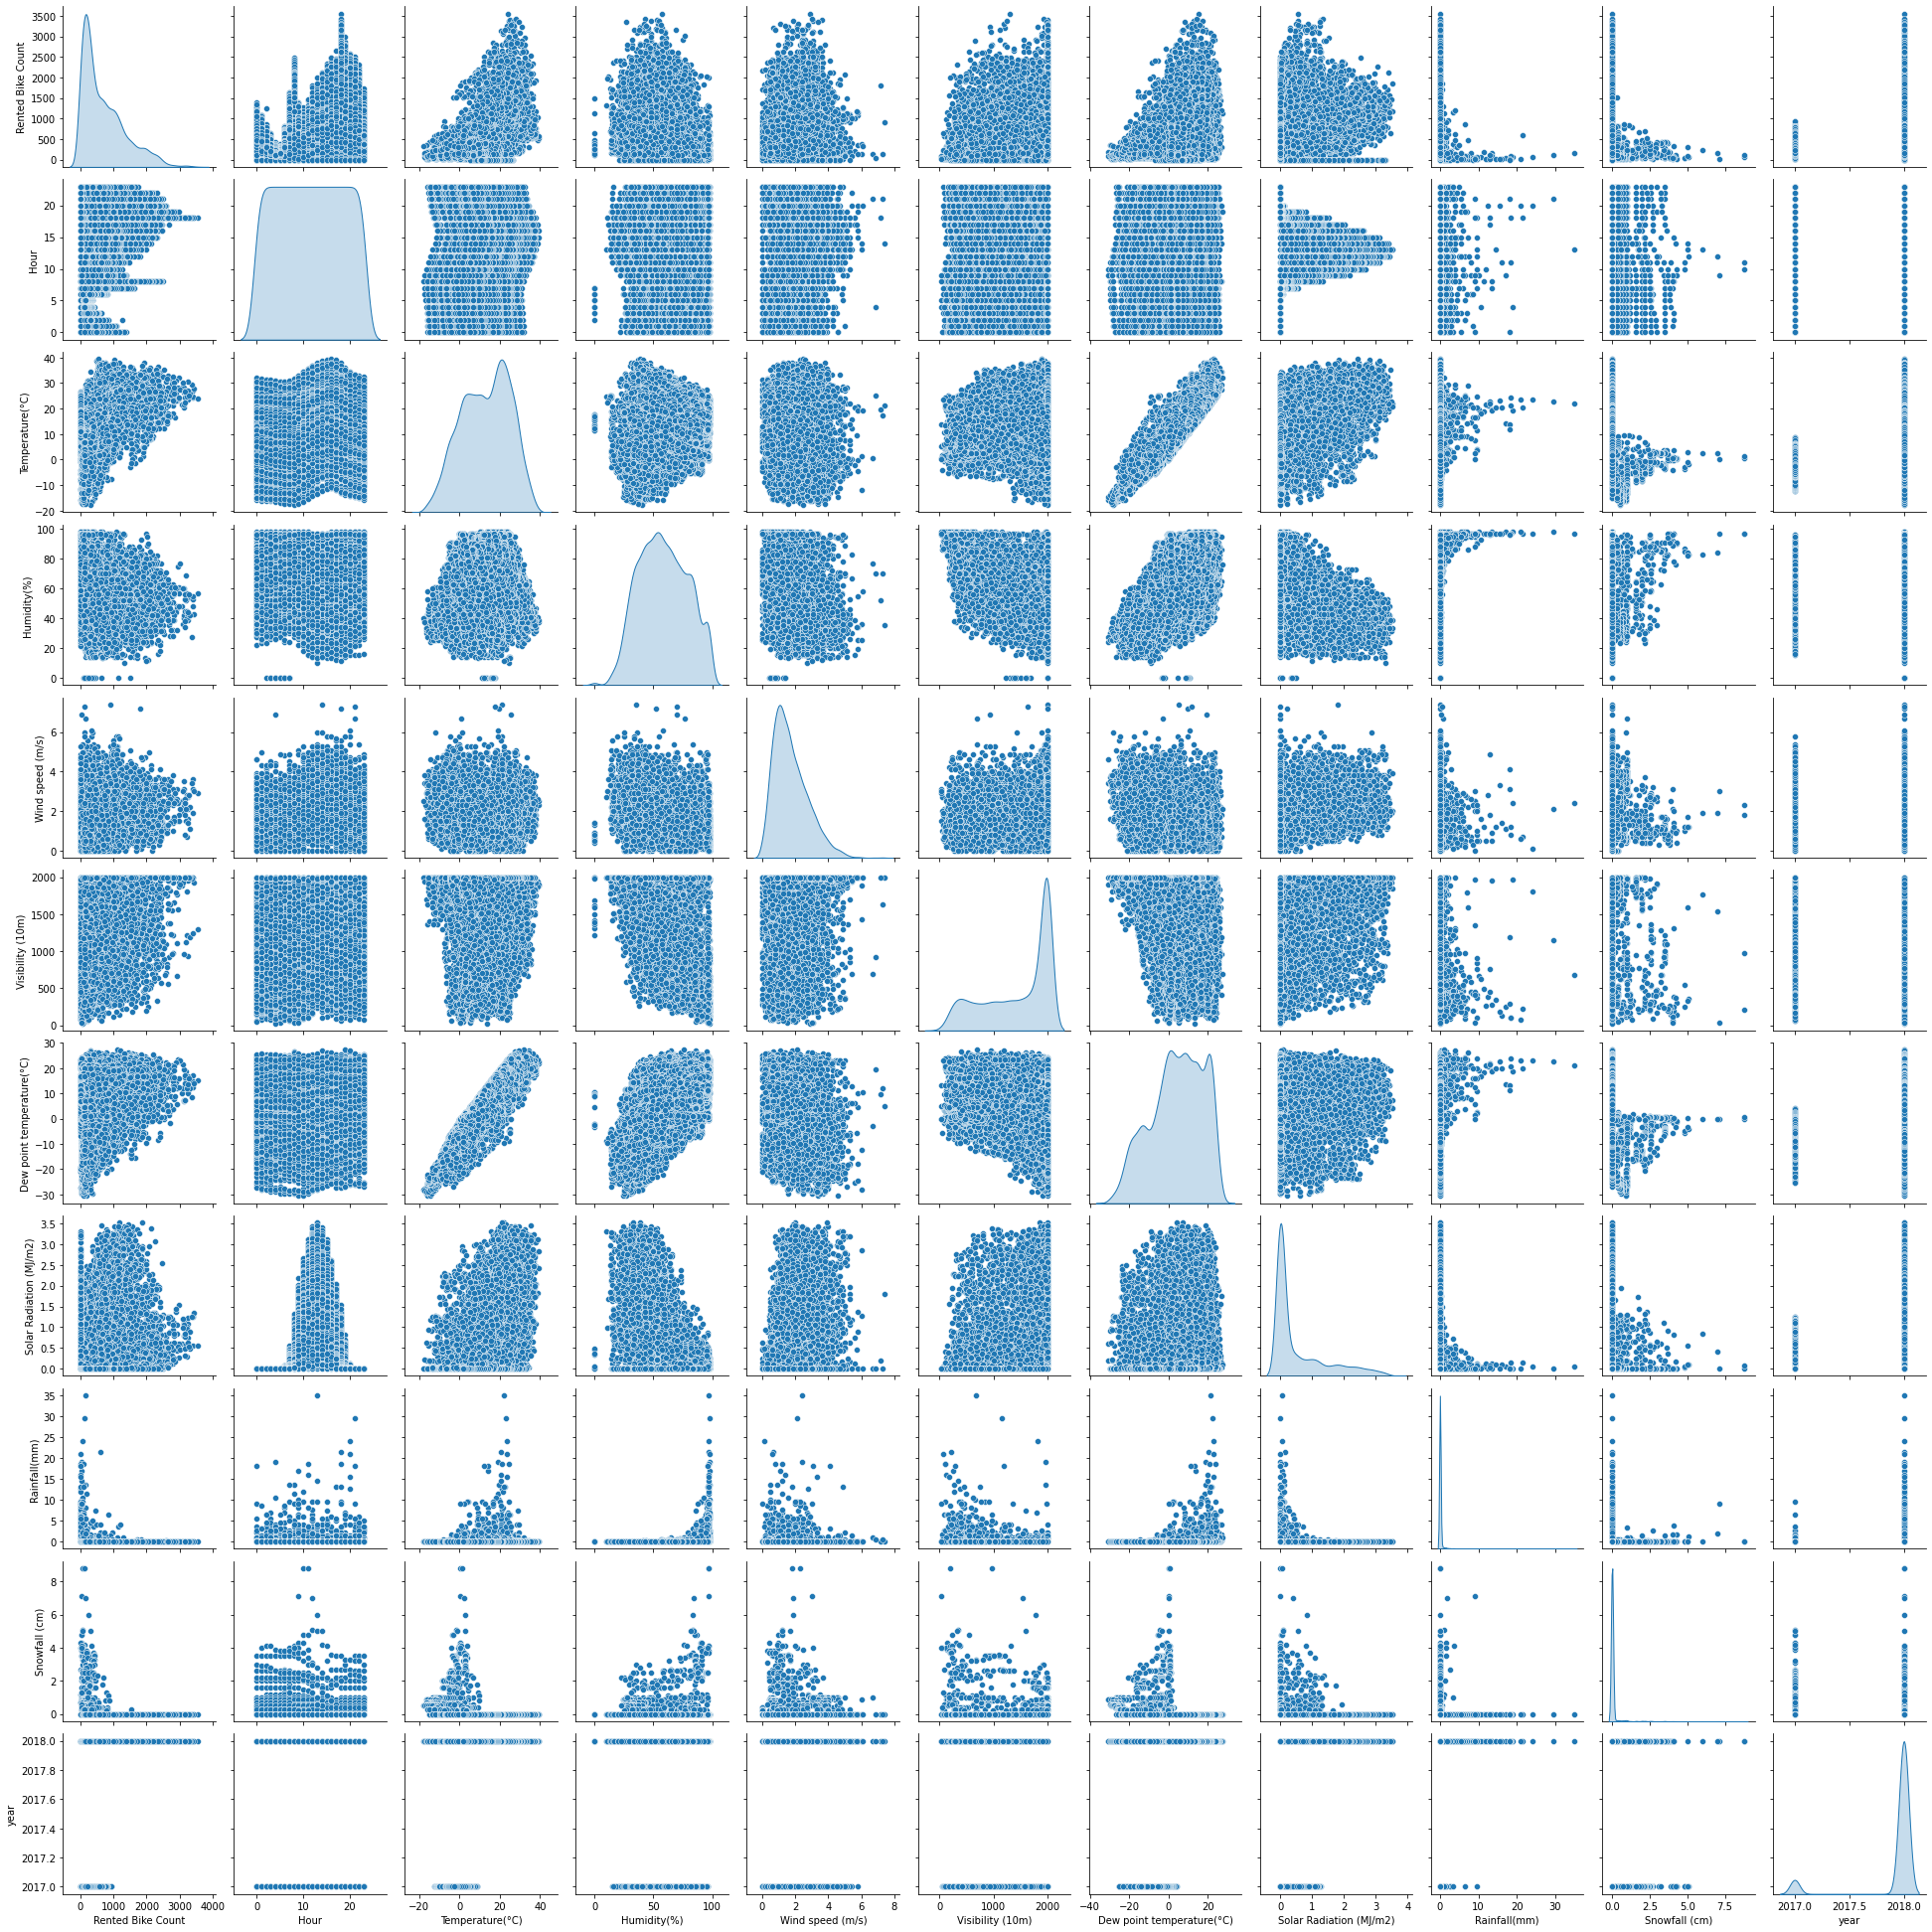

In [18]:
sns.pairplot(bike_df, diag_kind= 'kde')            # for numeric features

 2) **Let install sweetviz library for beautiful visualization of features** 

In [19]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 51.4 MB/s eta 0:00:00


In [20]:
import sweetviz as sv
sweet_report = sv.analyze(bike_df)

                                             |          | [  0%]   00:00 -> (? left)


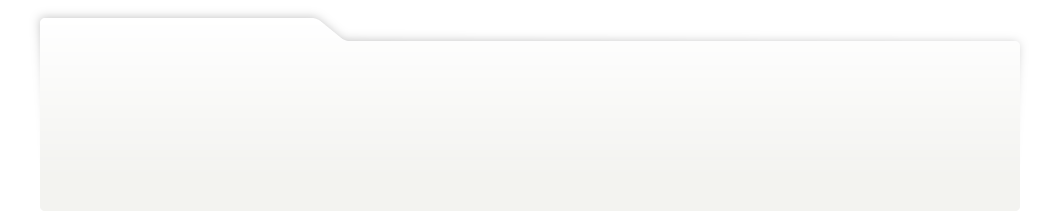
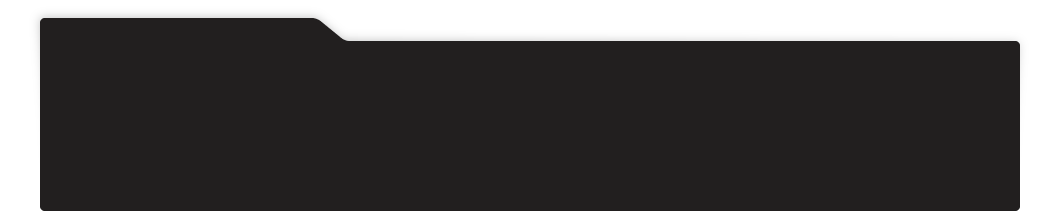
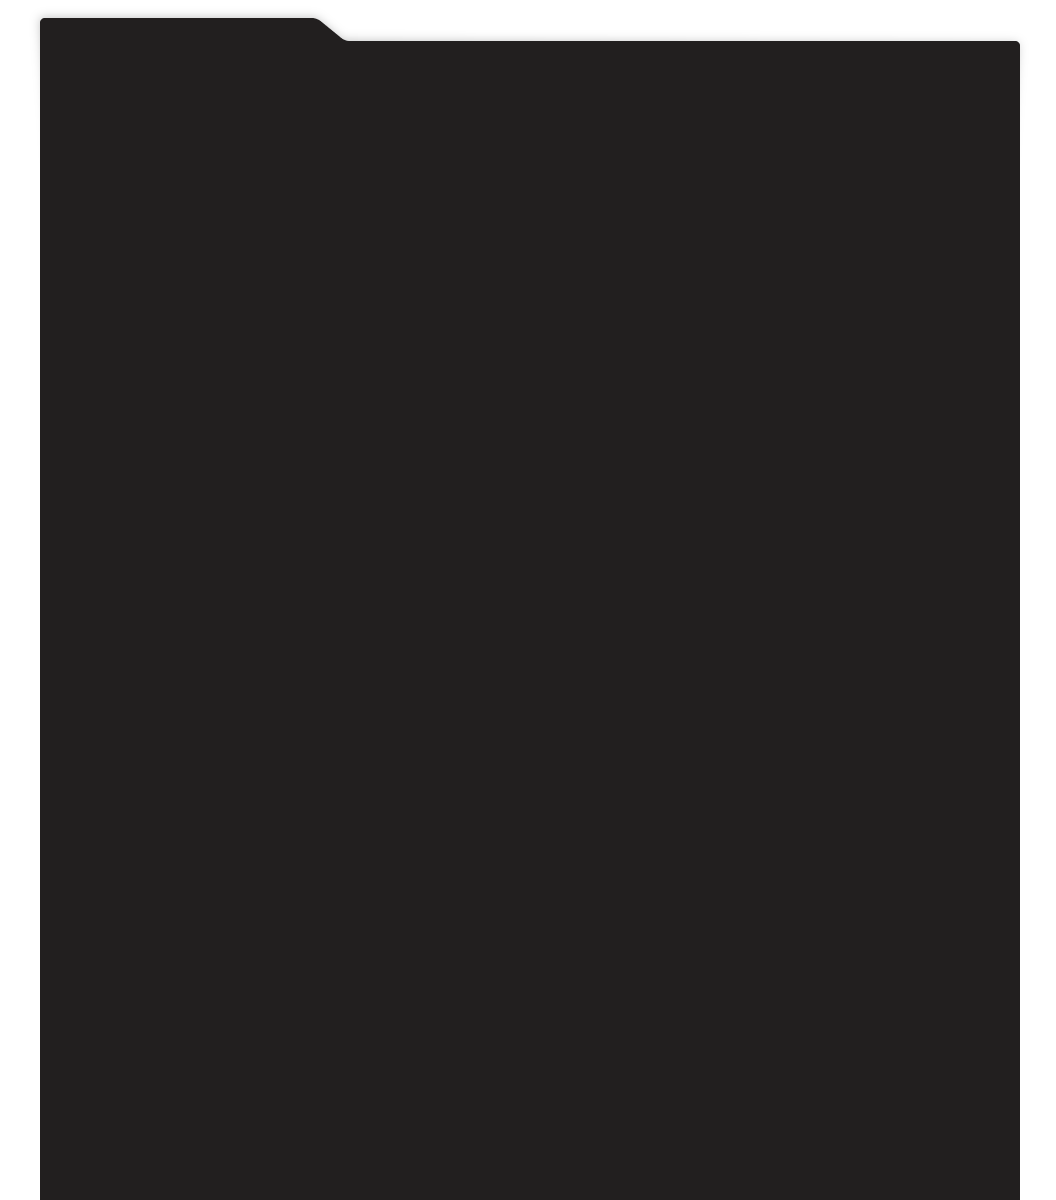
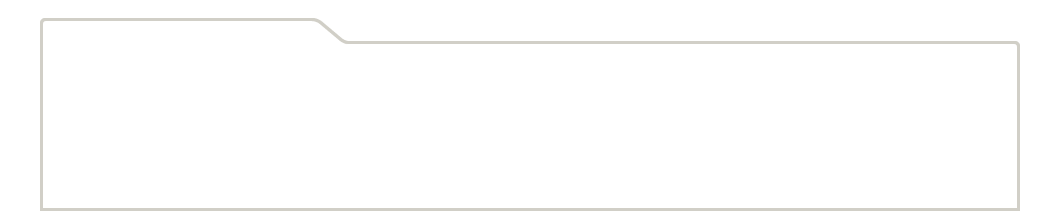
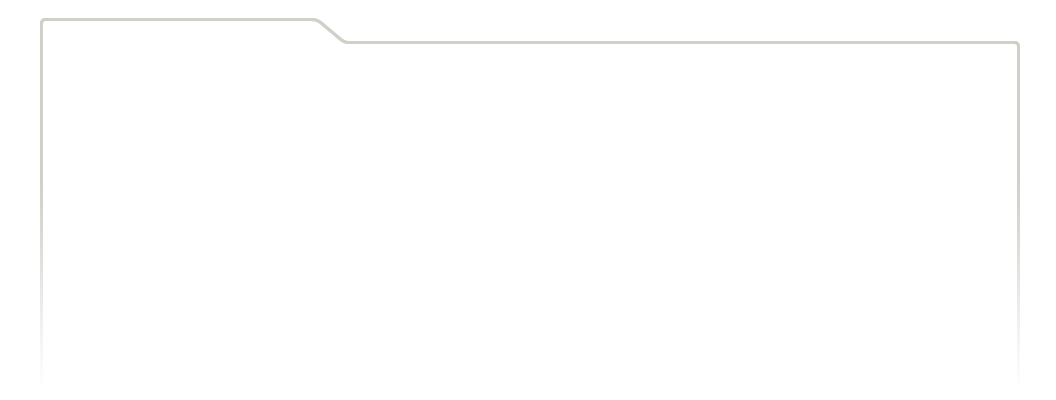
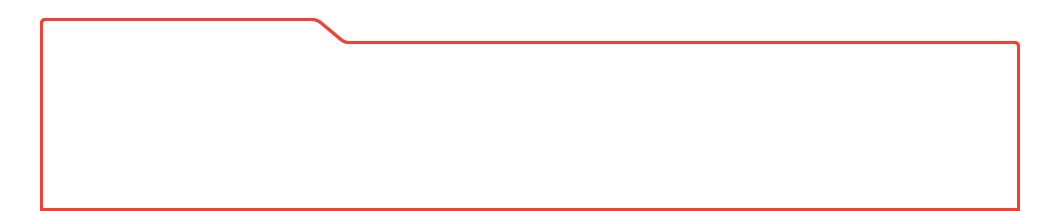
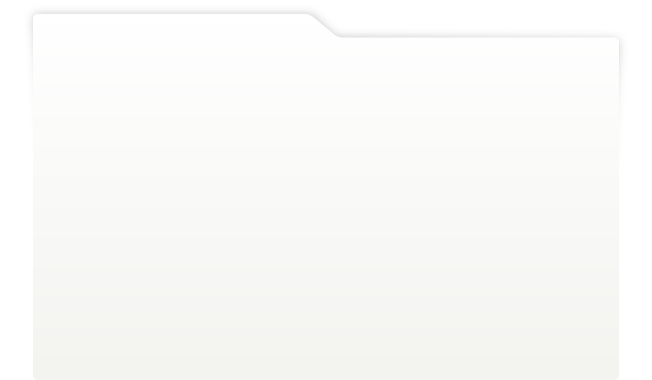
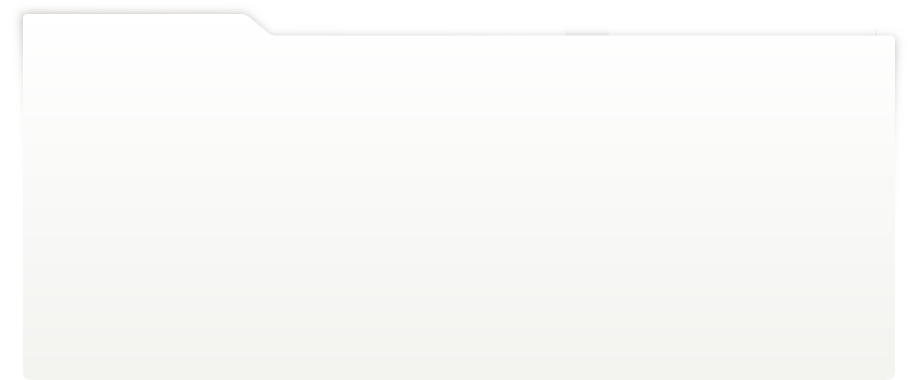
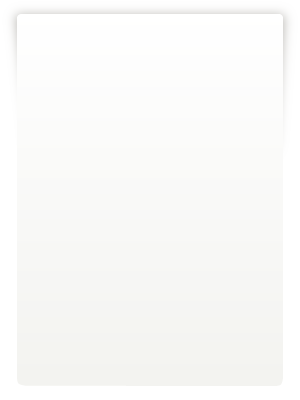
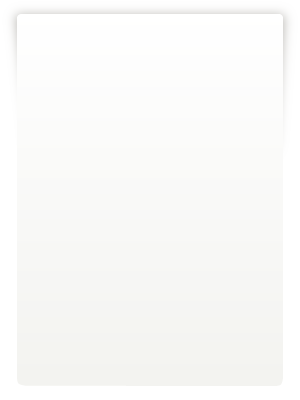
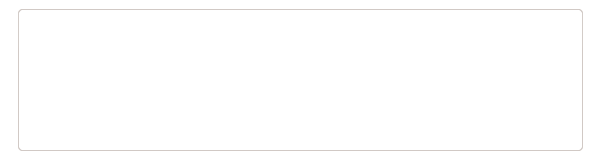
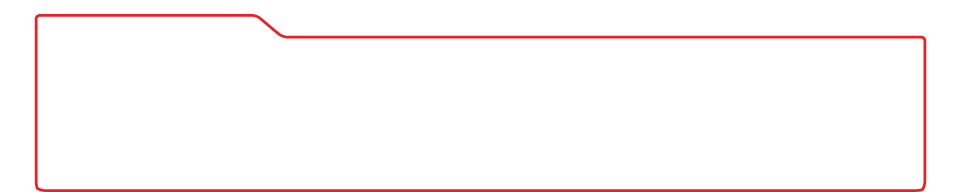
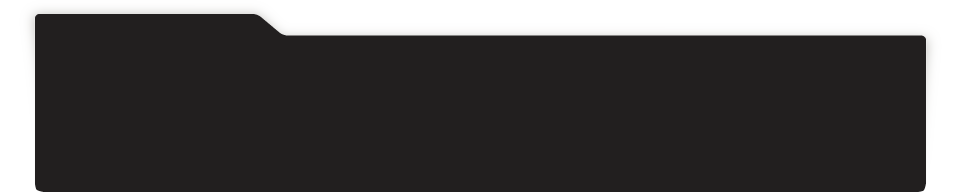
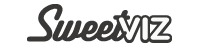
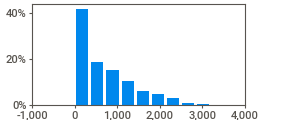
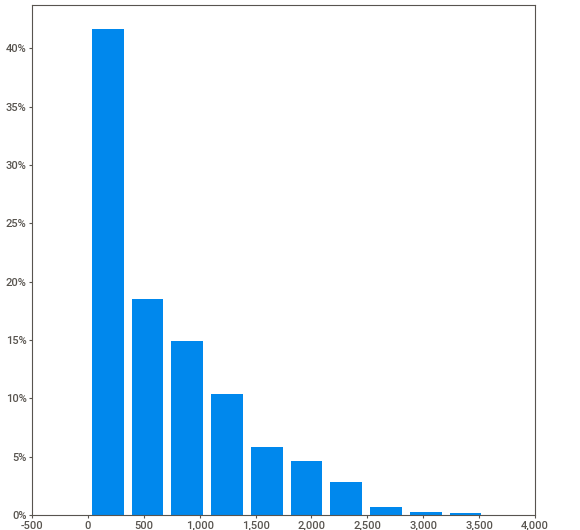
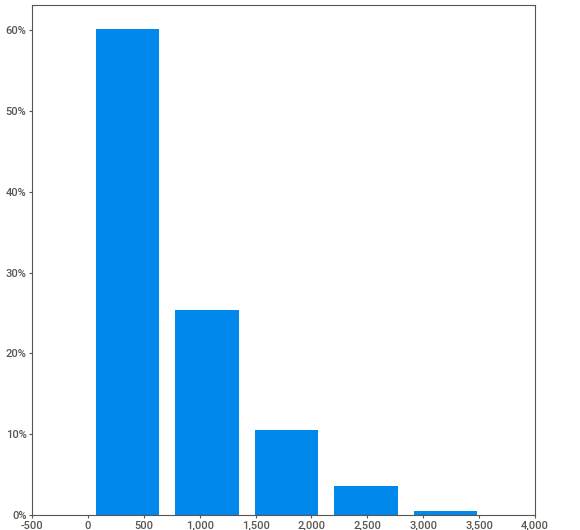
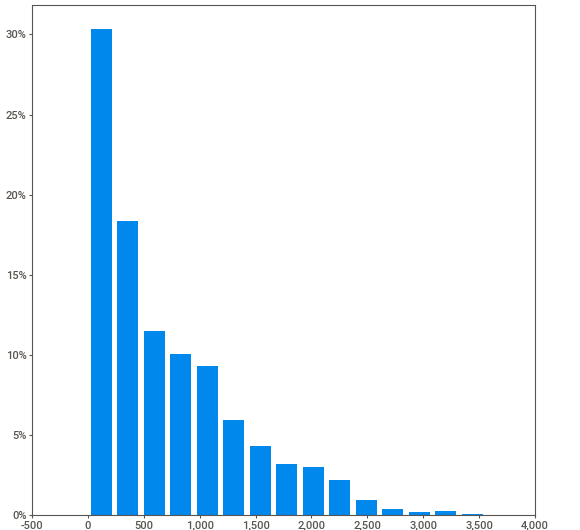
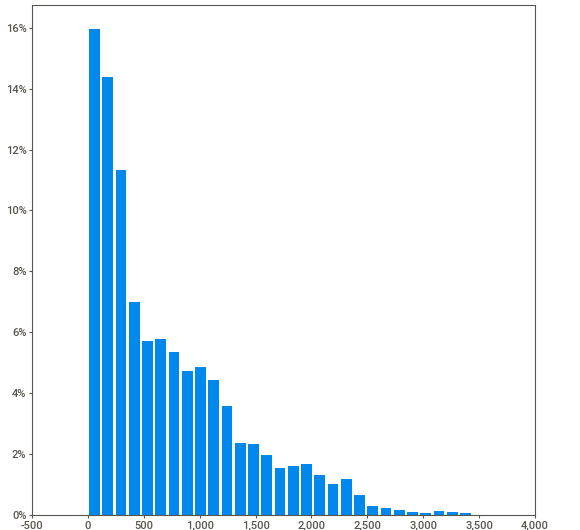
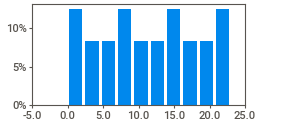
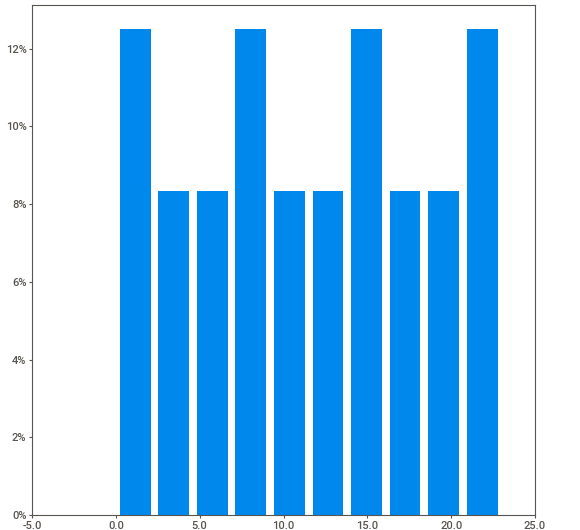
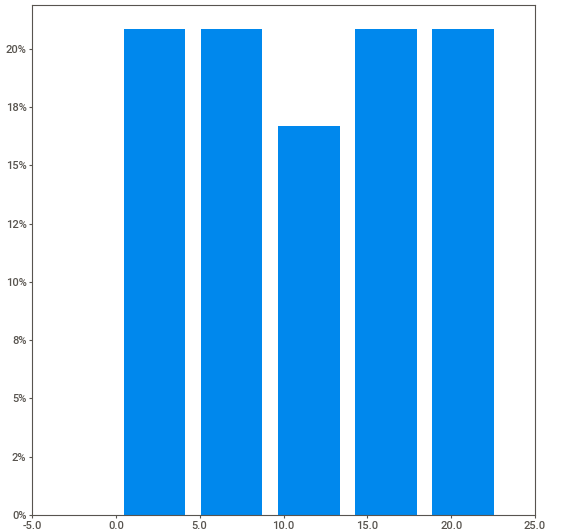
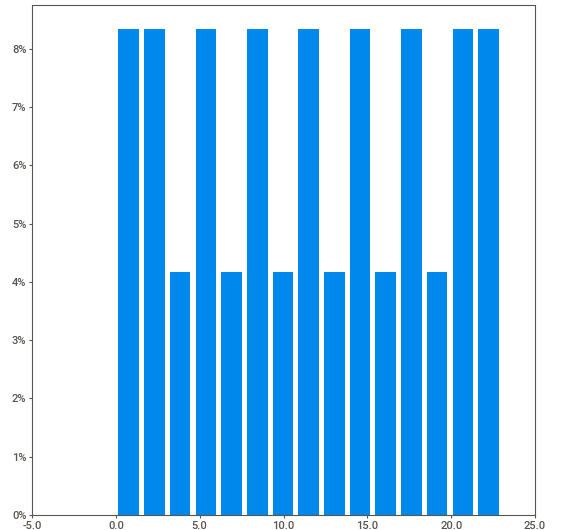
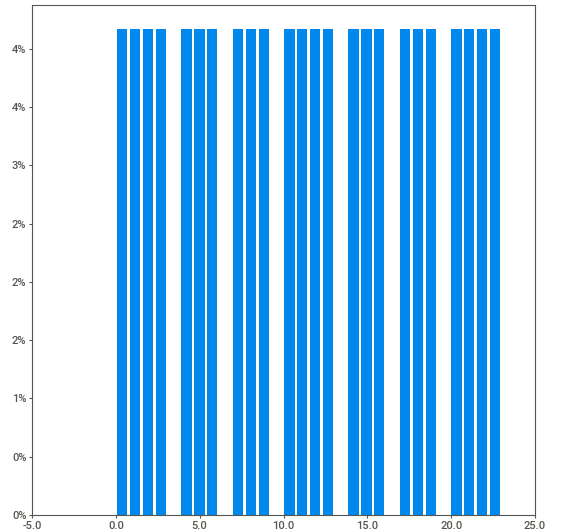
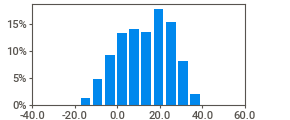
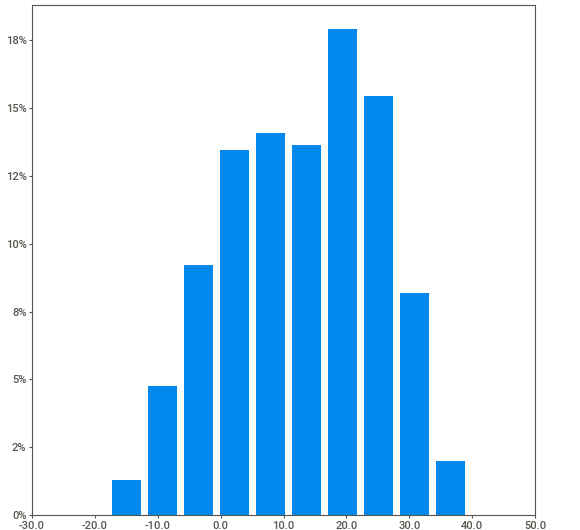
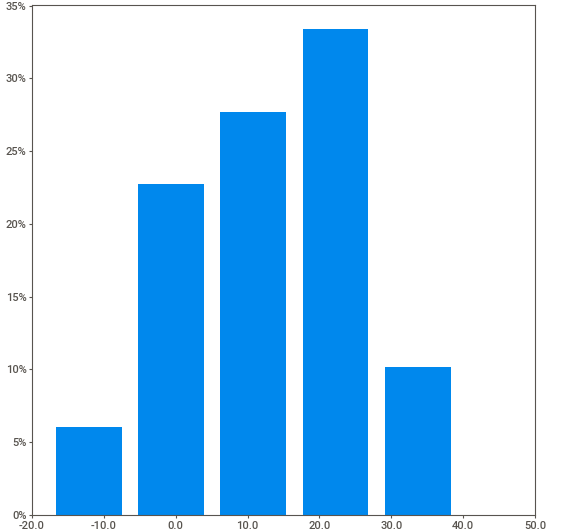
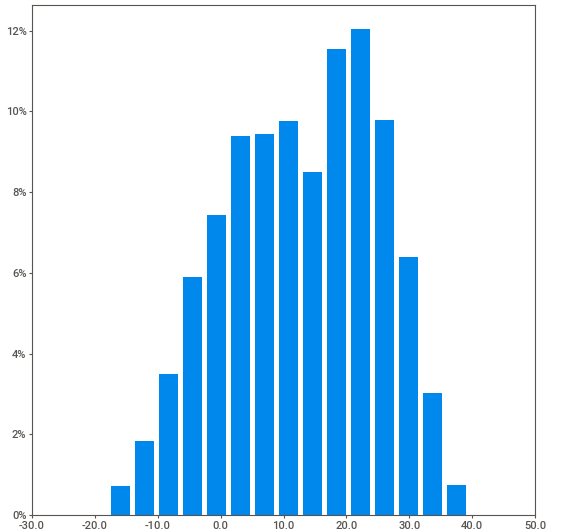
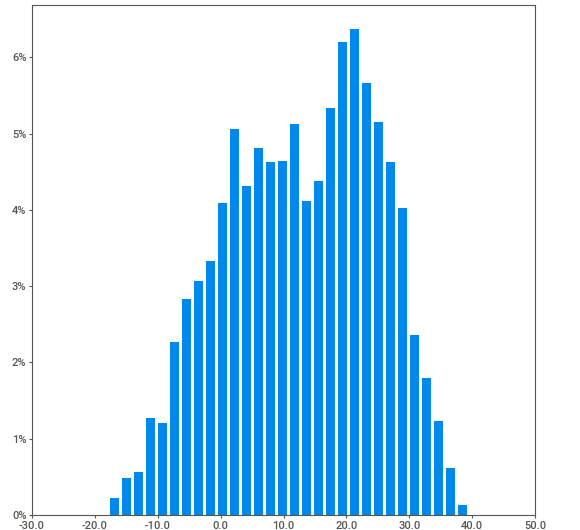
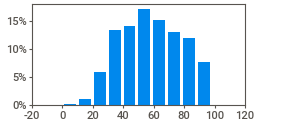
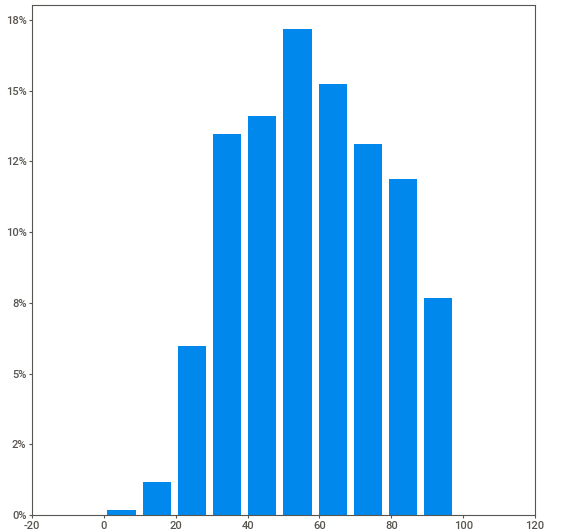
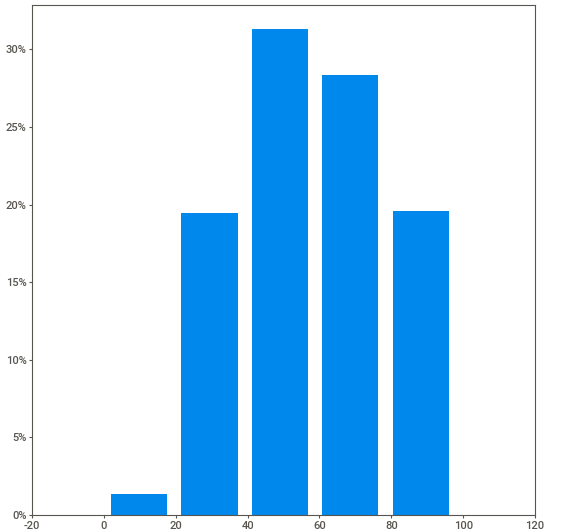
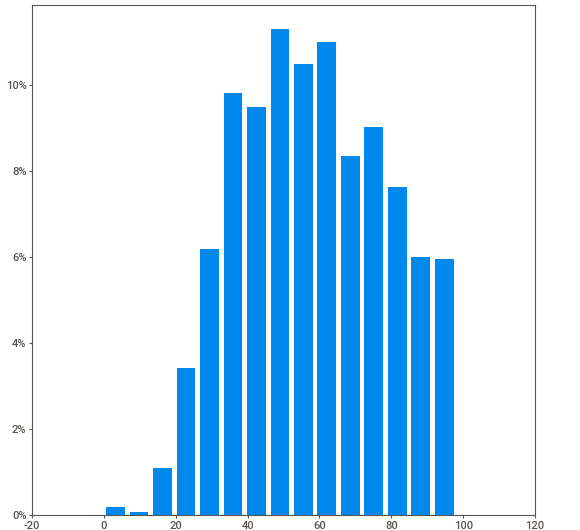
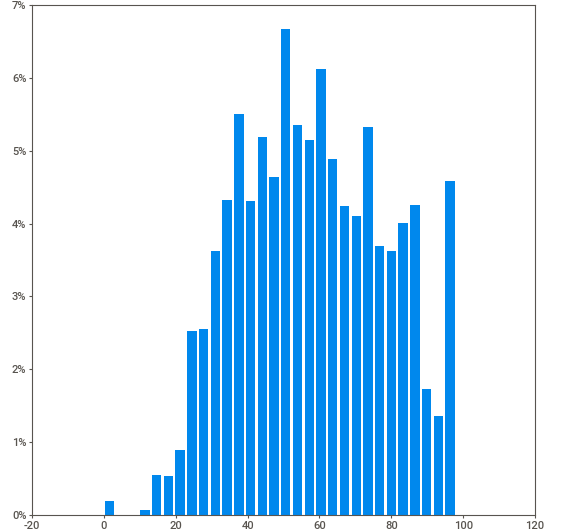
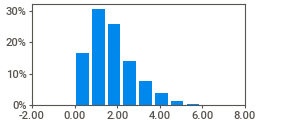
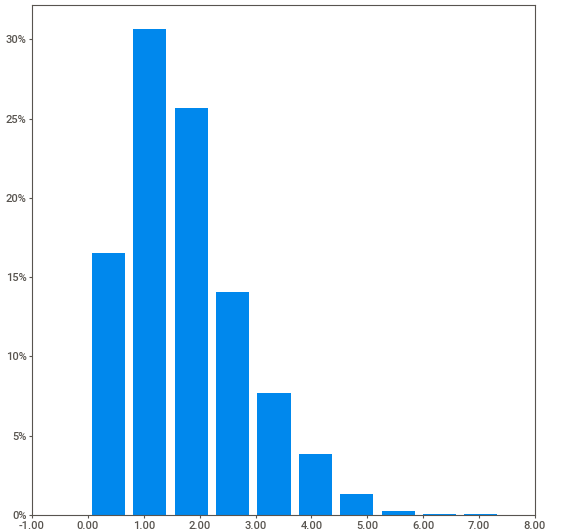
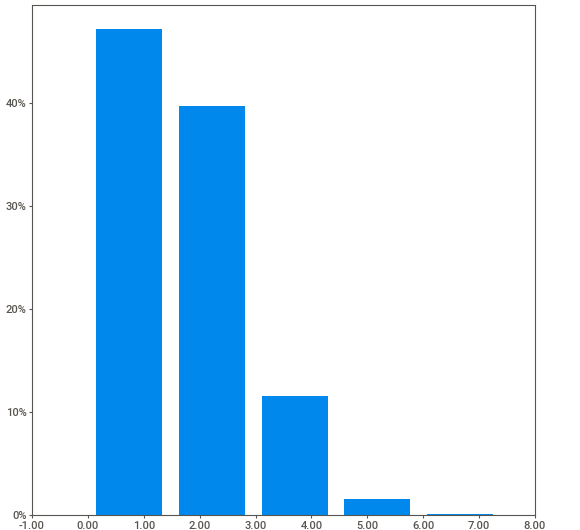
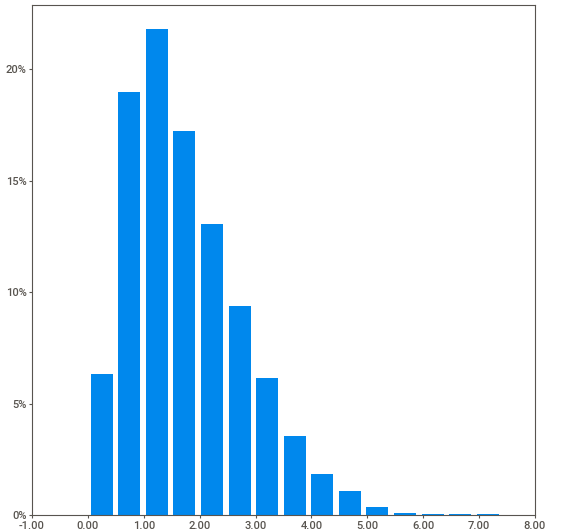
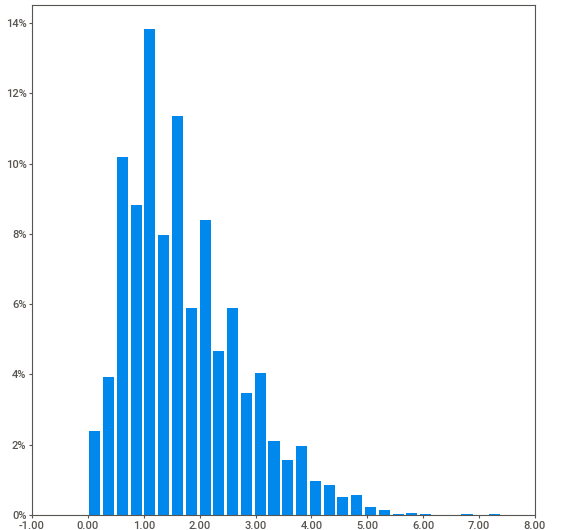
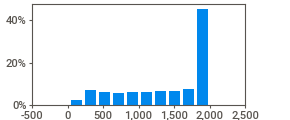
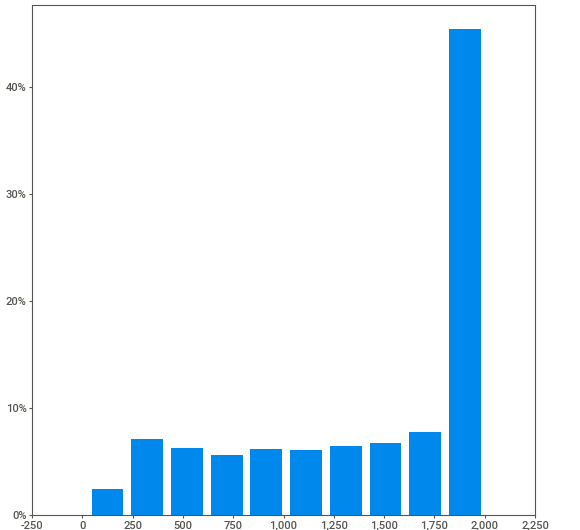
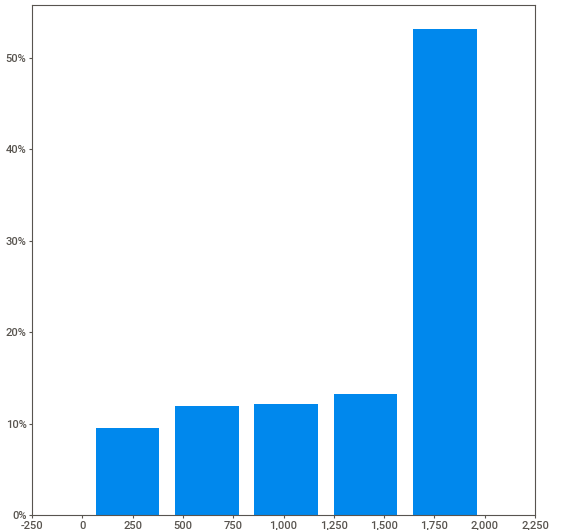
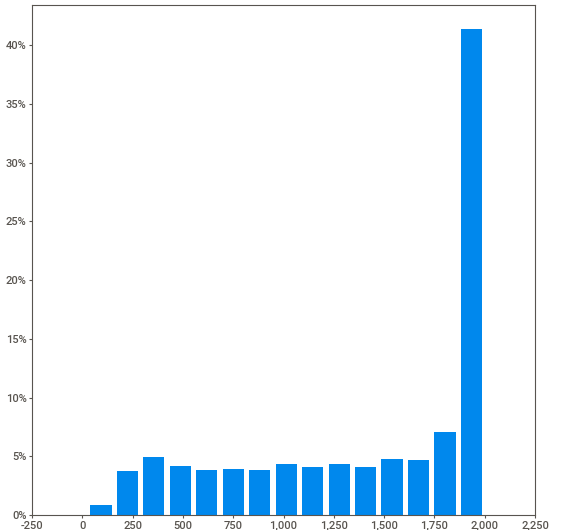
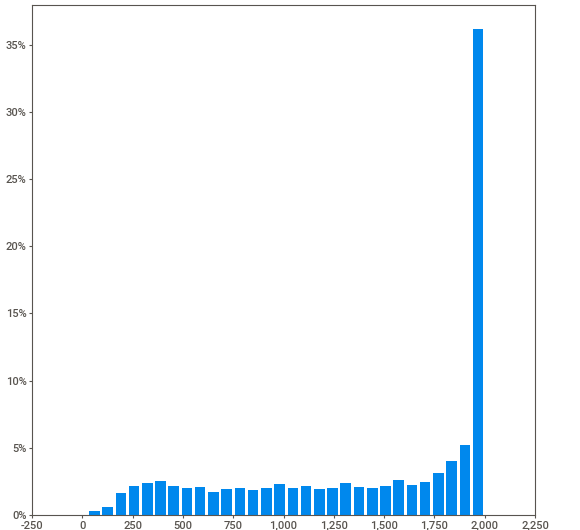
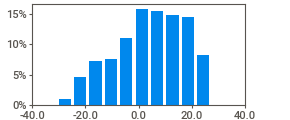
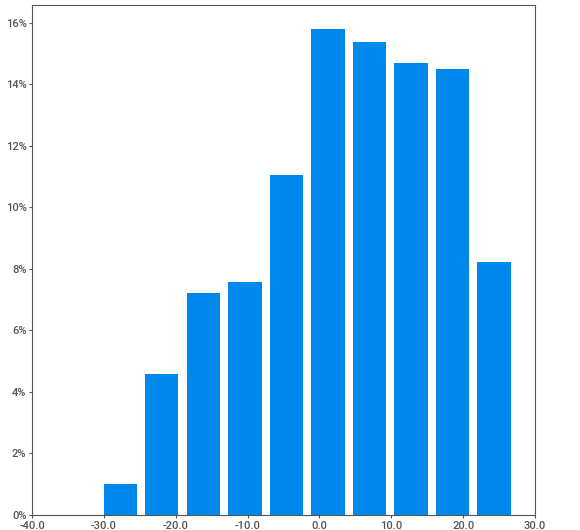
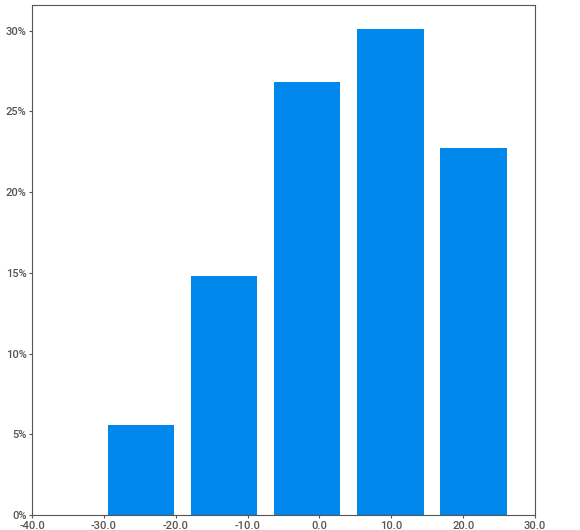
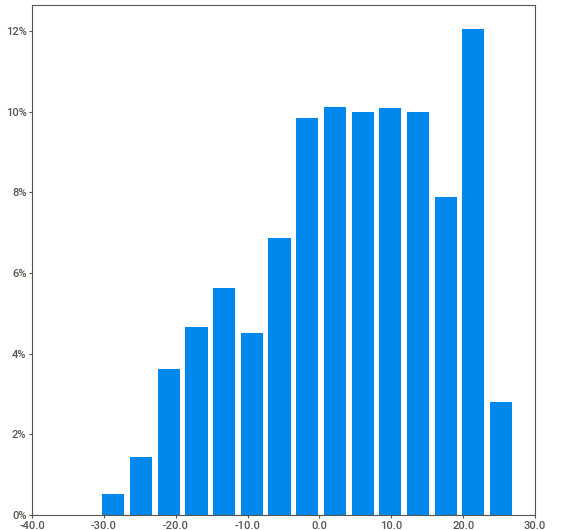
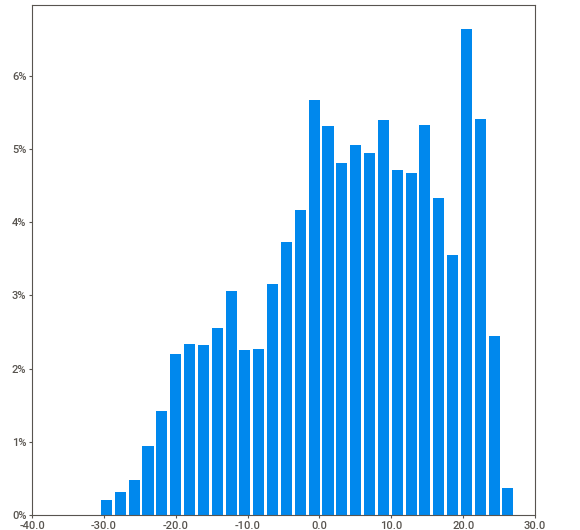
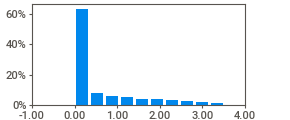
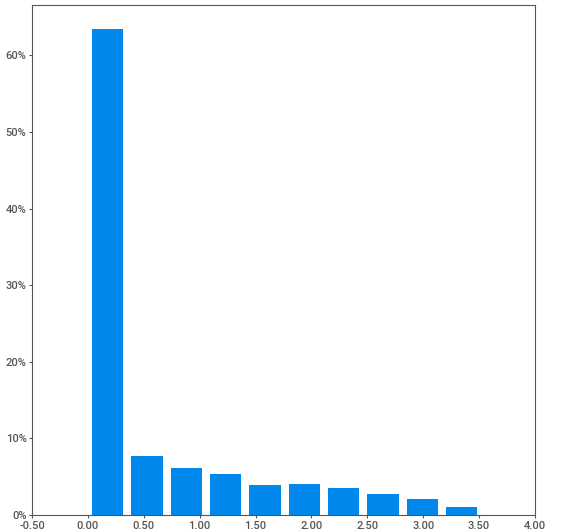
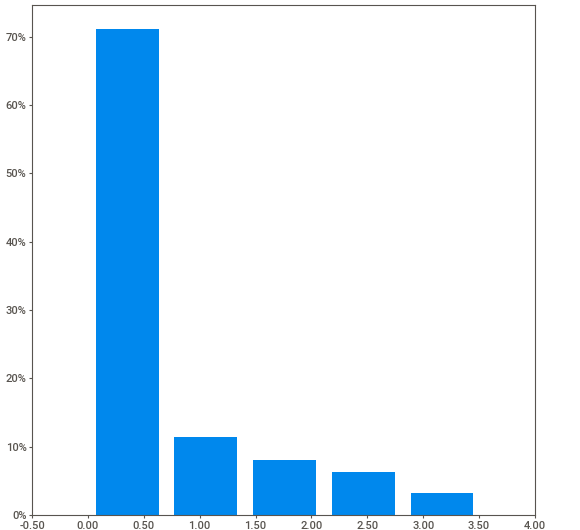
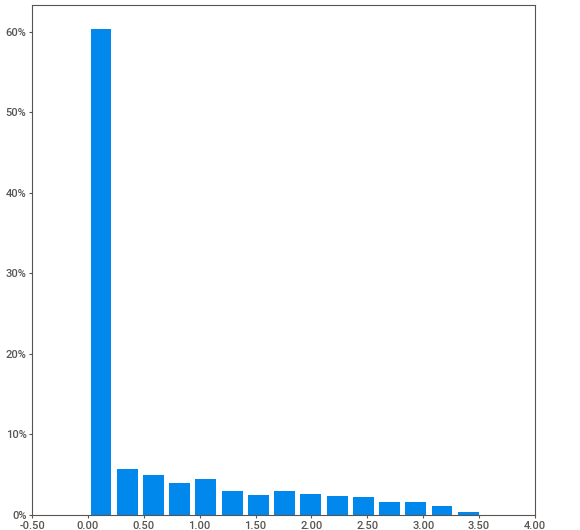
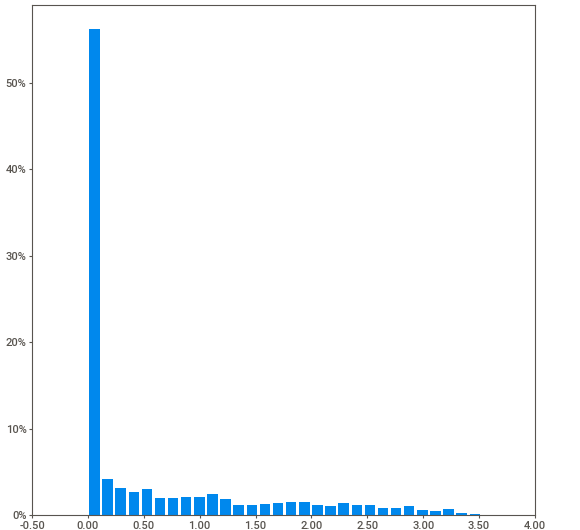
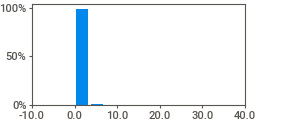
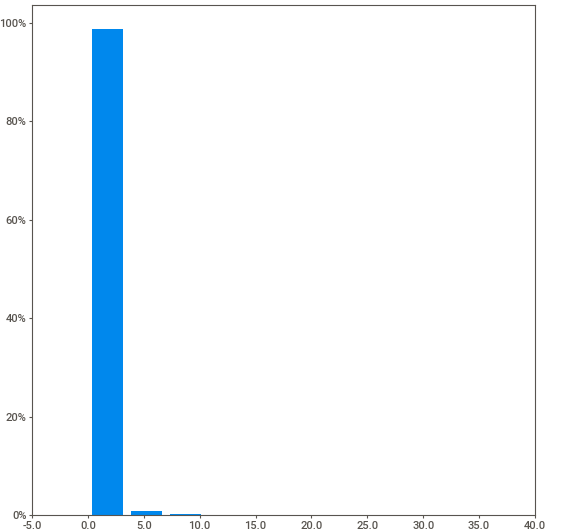
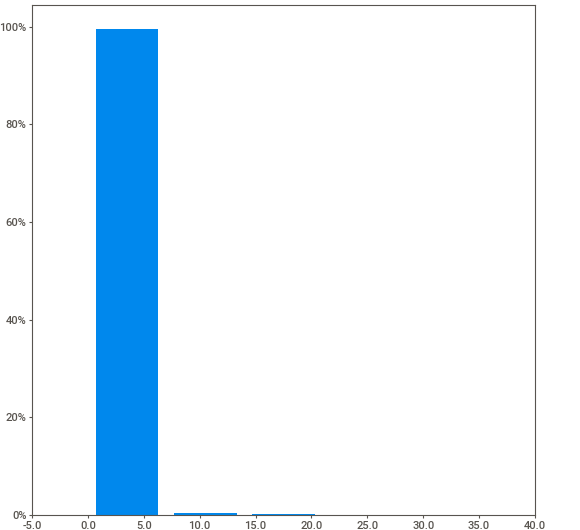
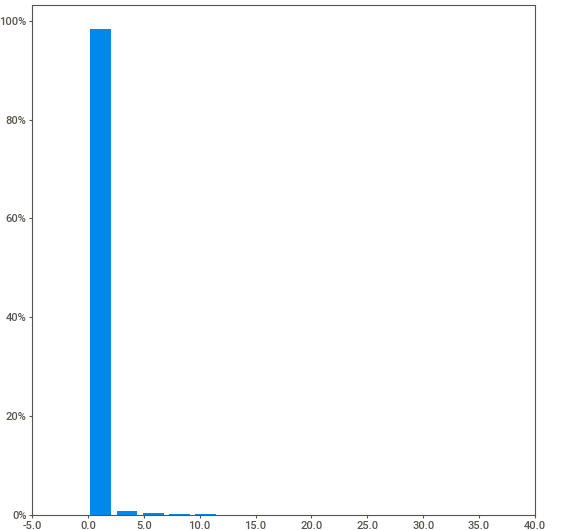
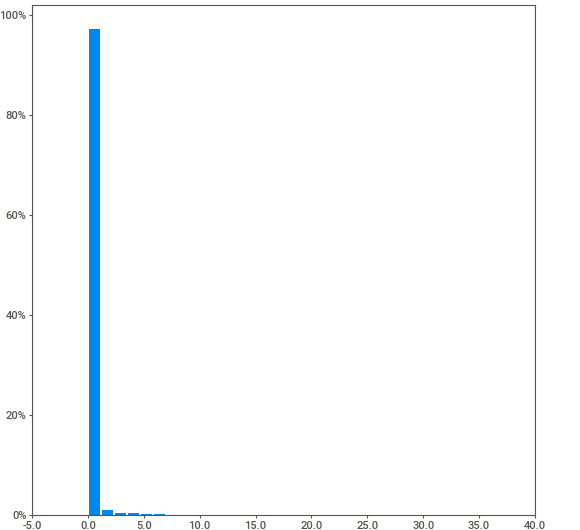
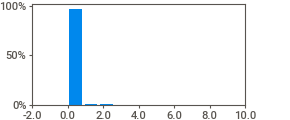
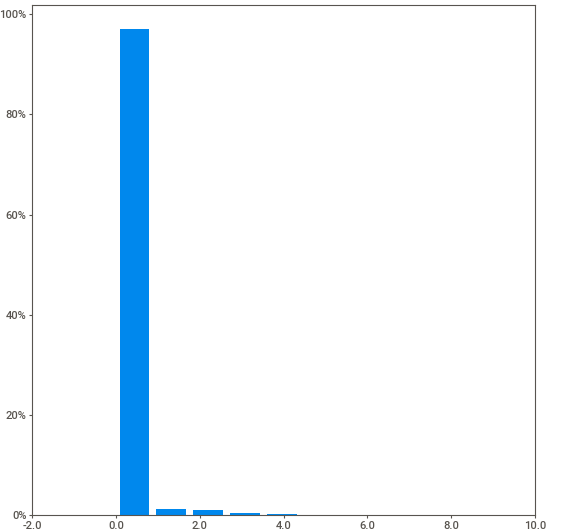
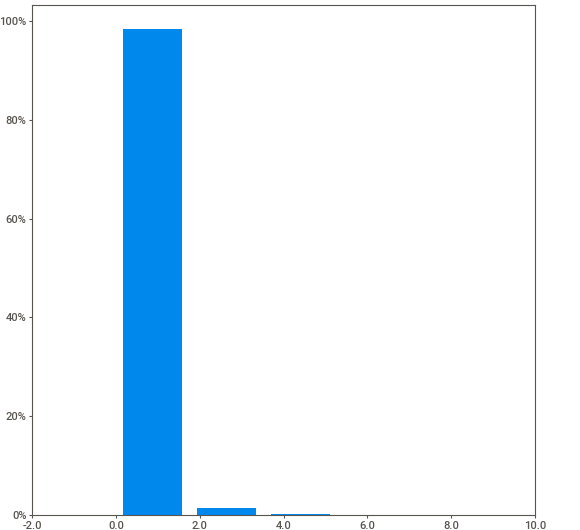
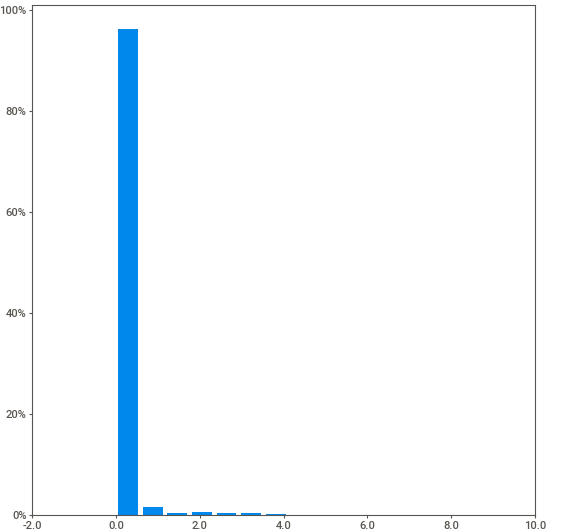
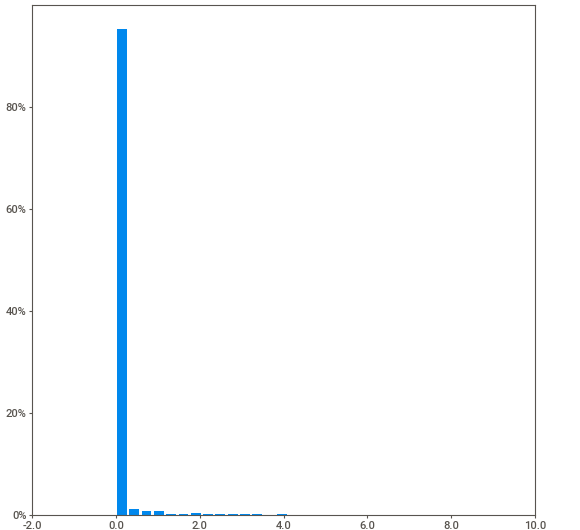
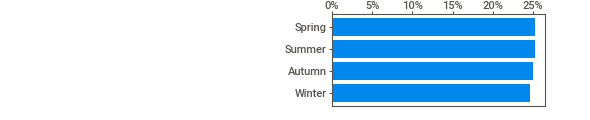
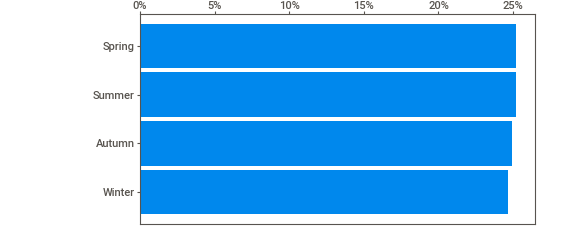
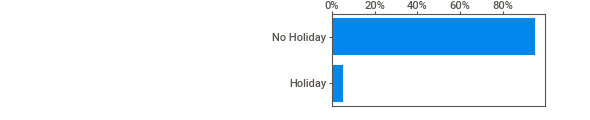
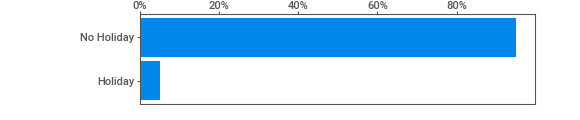
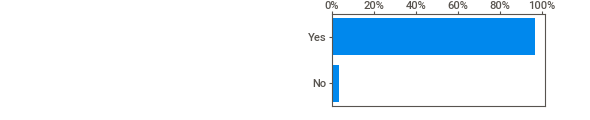
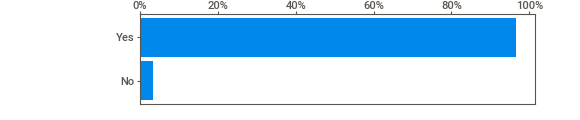
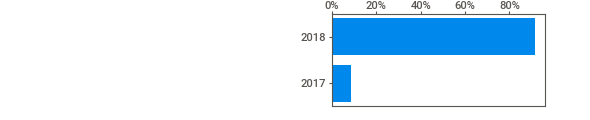
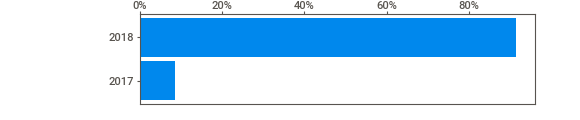
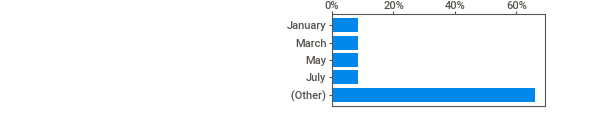
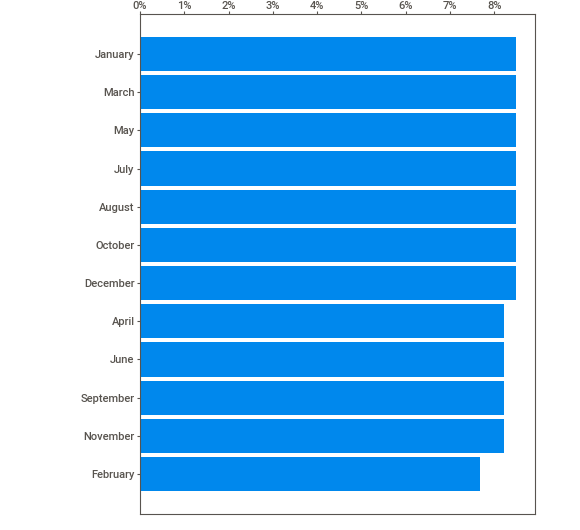
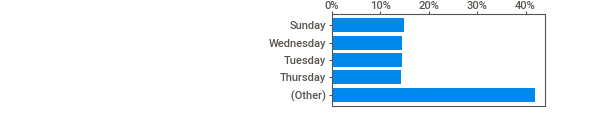
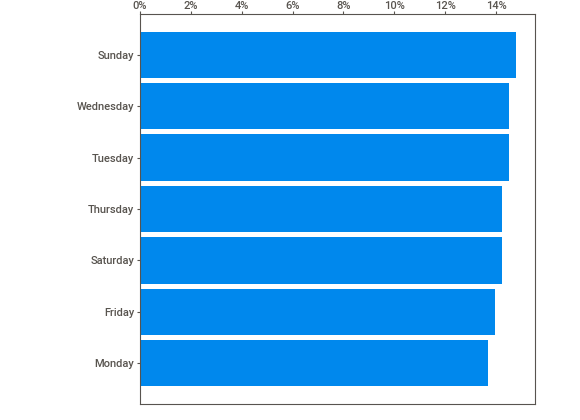
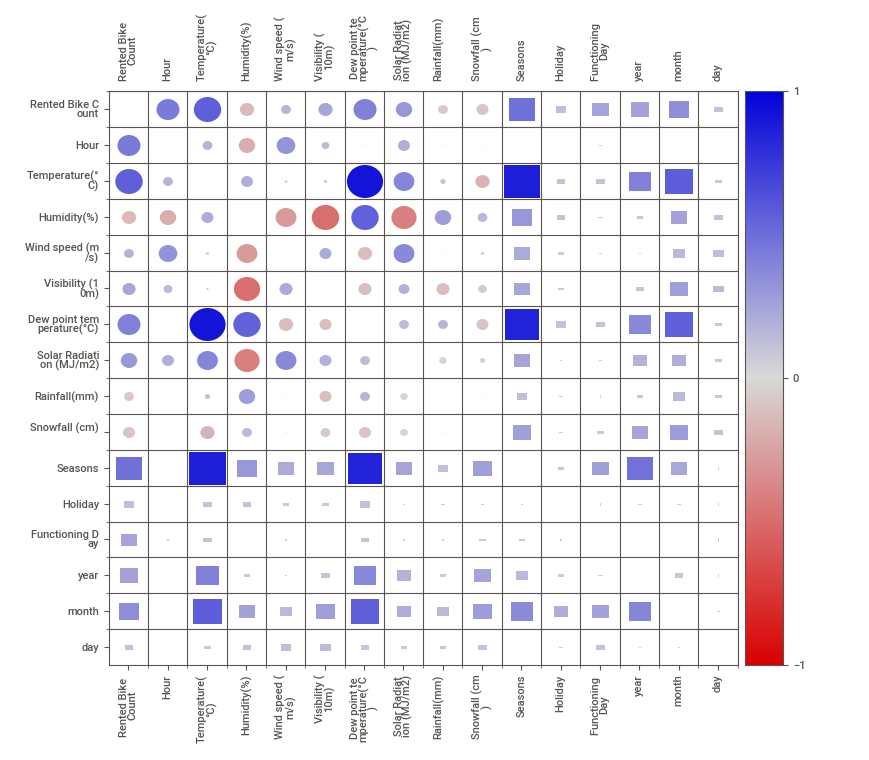
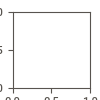

In [21]:
sweet_report.show_notebook()

In [22]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  year                       8760 non-null   objec


---> **Now after splitting operation we have 10 numerical features and 6 categorical features**. 

 **But When we observe the data we realize that 'Hour' column is a numerical column but it is a data type of time stamp so we have to treat Hour as a categorical feature**.

 **so changing "Hour" column -->'int' dtype into  'object' dtype**

In [23]:
bike_df['Hour']= bike_df['Hour'].astype('object')     # converting numerical Hour column datatype into categorical column

In [24]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  year                       8760 non-null   objec

----> **Now we get **

**Number of Numerical Features** = 9

**Number of  Categorical Features** = 7

3) **Storing Numeric and categorical features separately** --->

In [25]:
numeric_features = bike_df.describe().columns

categorical_features = bike_df.describe(include=['object','category']).columns

In [26]:
numeric_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [27]:
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'year', 'month',
       'day'],
      dtype='object')

## 4] Analysing Categorical features

5)  **Let us check how the categorical features are distributed in dataset**.

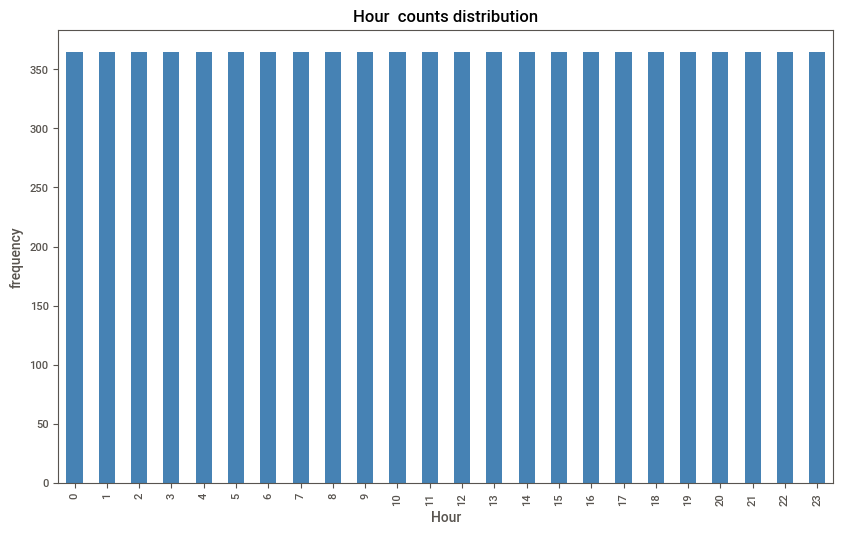

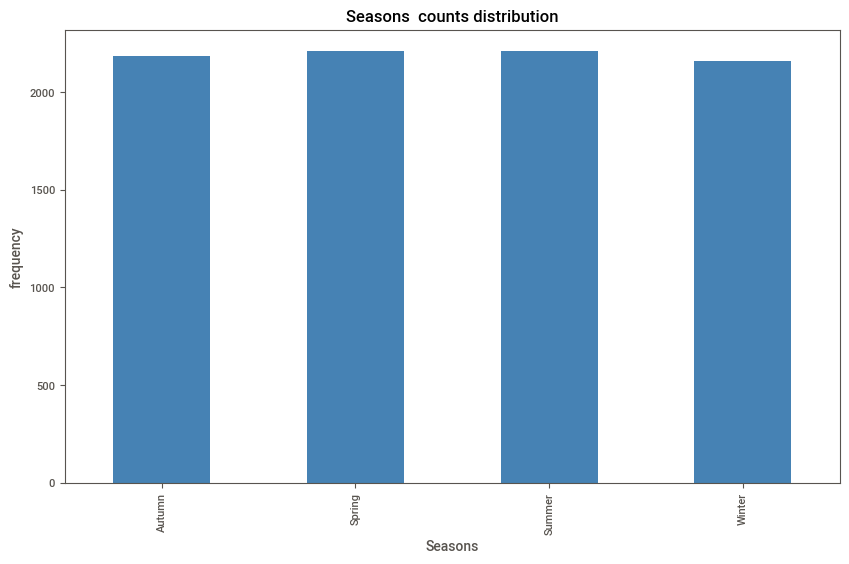

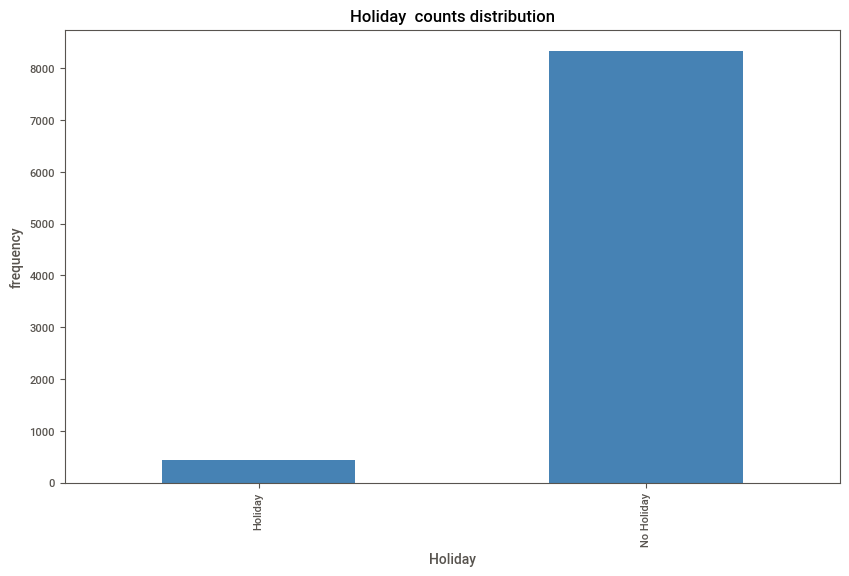

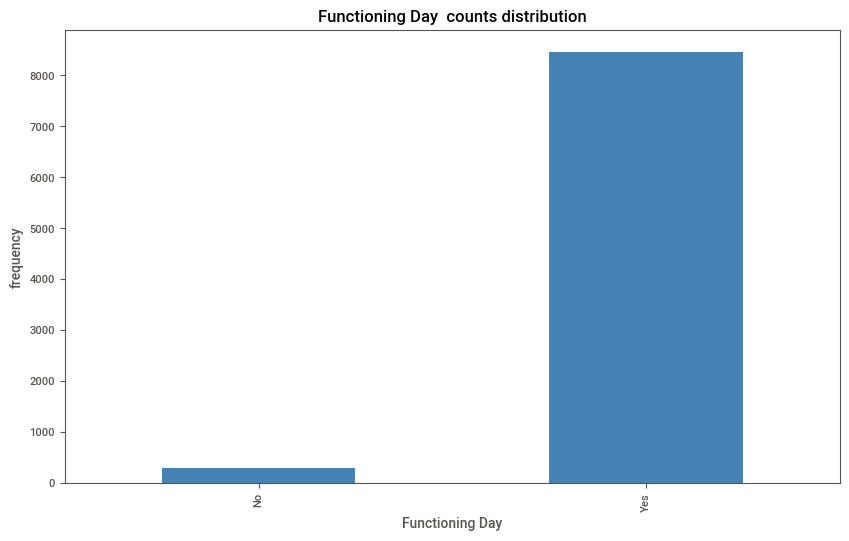

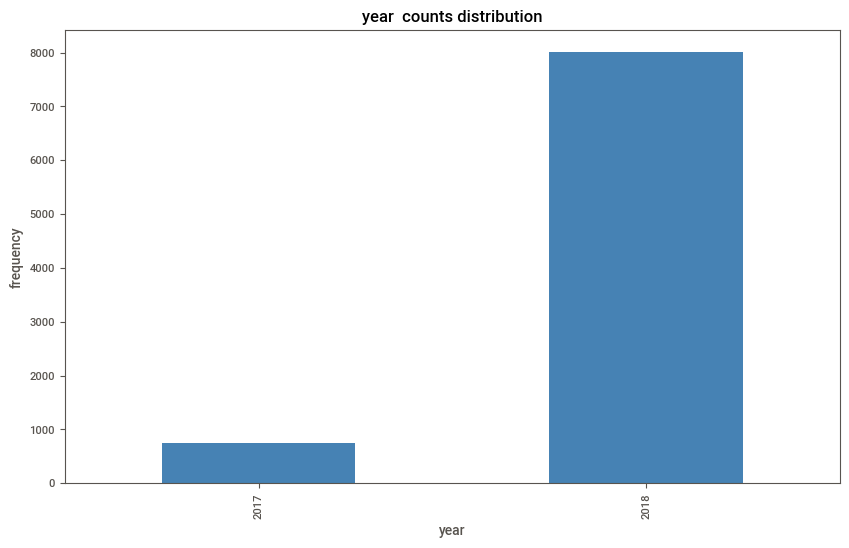

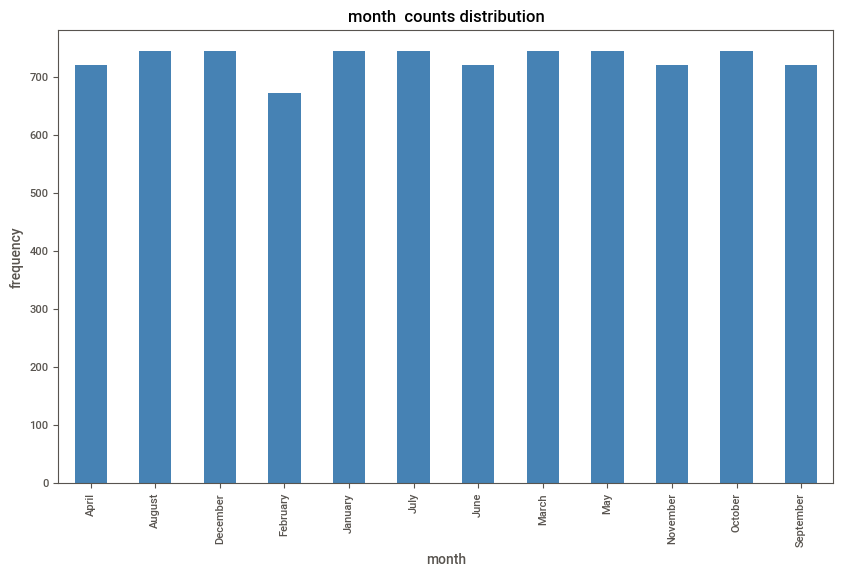

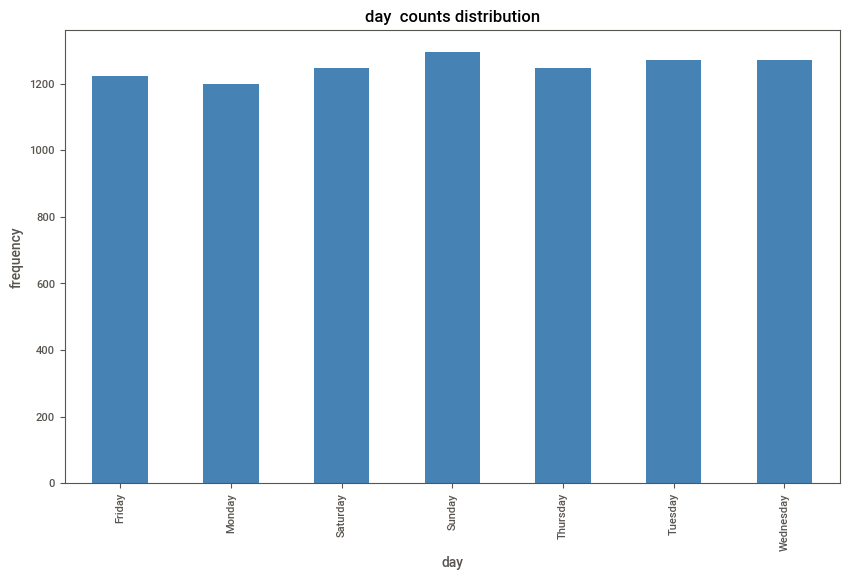

In [28]:
for col in categorical_features:
  counts = bike_df[col].value_counts().sort_index()
  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()                                         ## gca - to get current axis
  counts.plot.bar(ax=ax,color='steelblue')
  ax.set_title(col+'  counts distribution')
  ax.set_xlabel(col)
  ax.set_ylabel('frequency')

plt.show()

----> **From all these above count plots we can make a very good observations** :-

1) **Seasons feature distribution in our dataset is same for all the seasons i.e. - data distribution frequency is evenly distributed in ( Autumn(Fall), Spring, Summer, Winter )**

2) **From Holiday column feature we can predict that most of the Data is present for Non holiday**.

3) **From functioning day column we can say 90% data present is for when functioning day is present**.

4) **From year column we can say that 80% data is for year 2018**.

6) **Now let us study How the categorical features are distributed with respect to dependent feature for different hours in a day**.

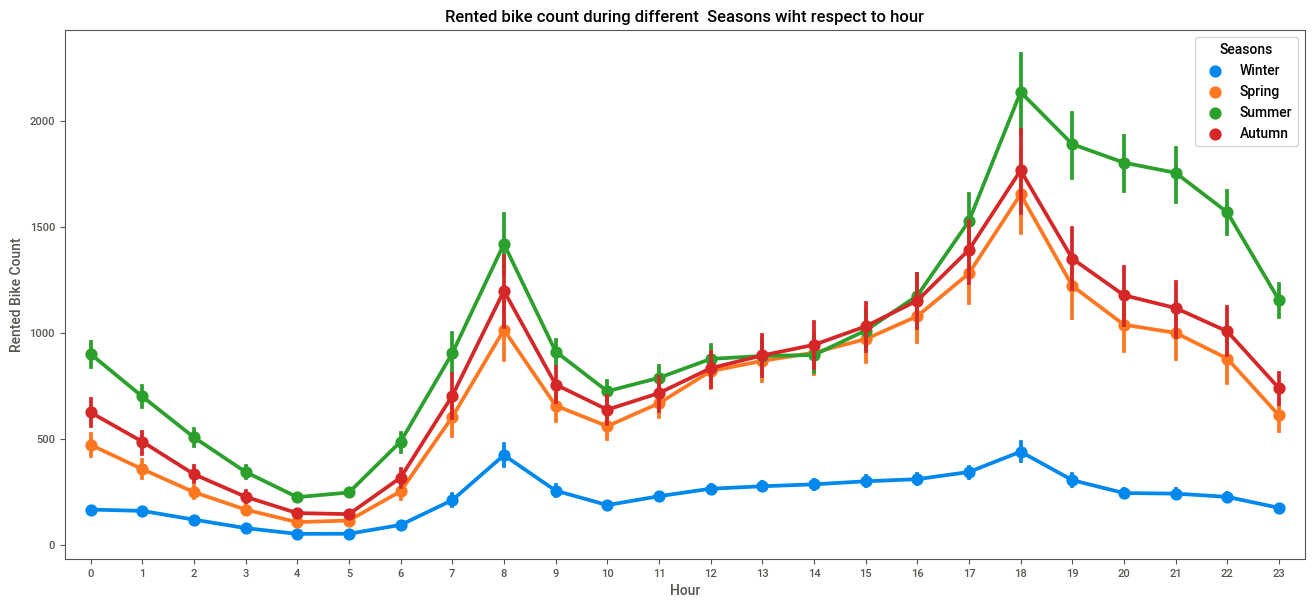

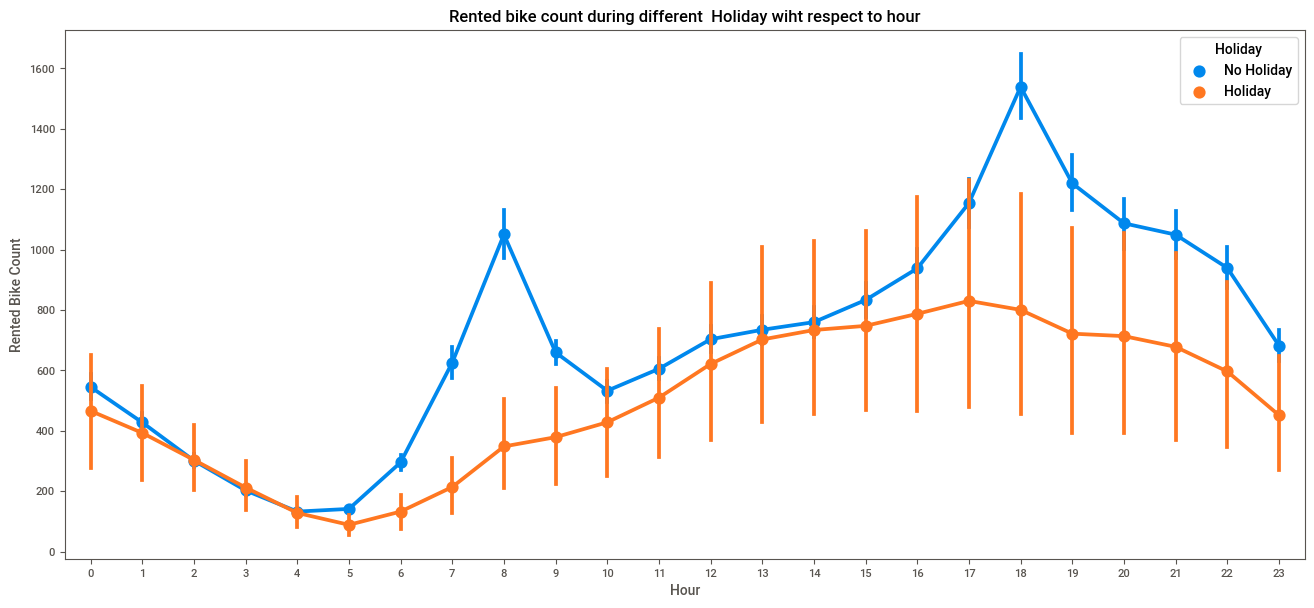

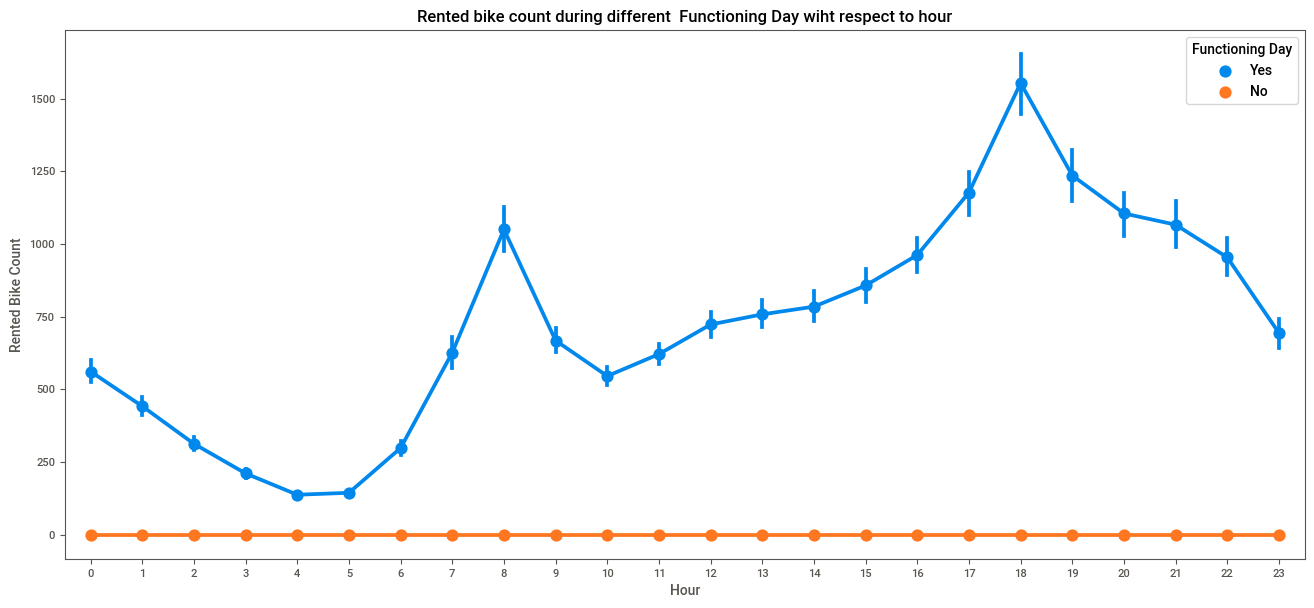

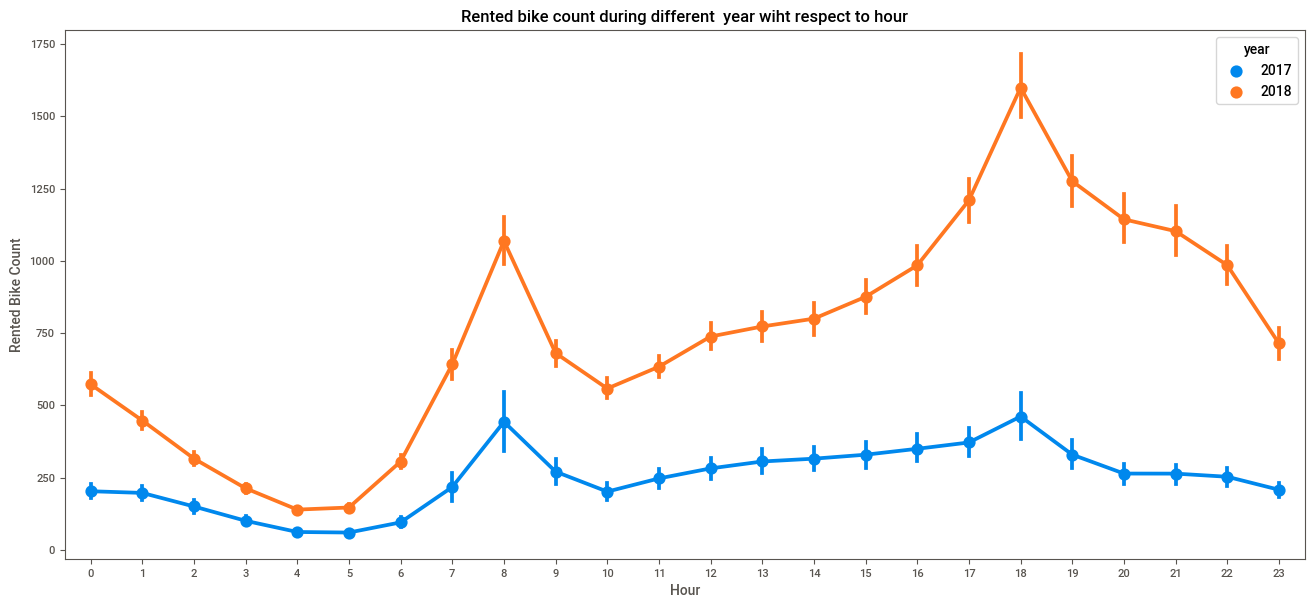

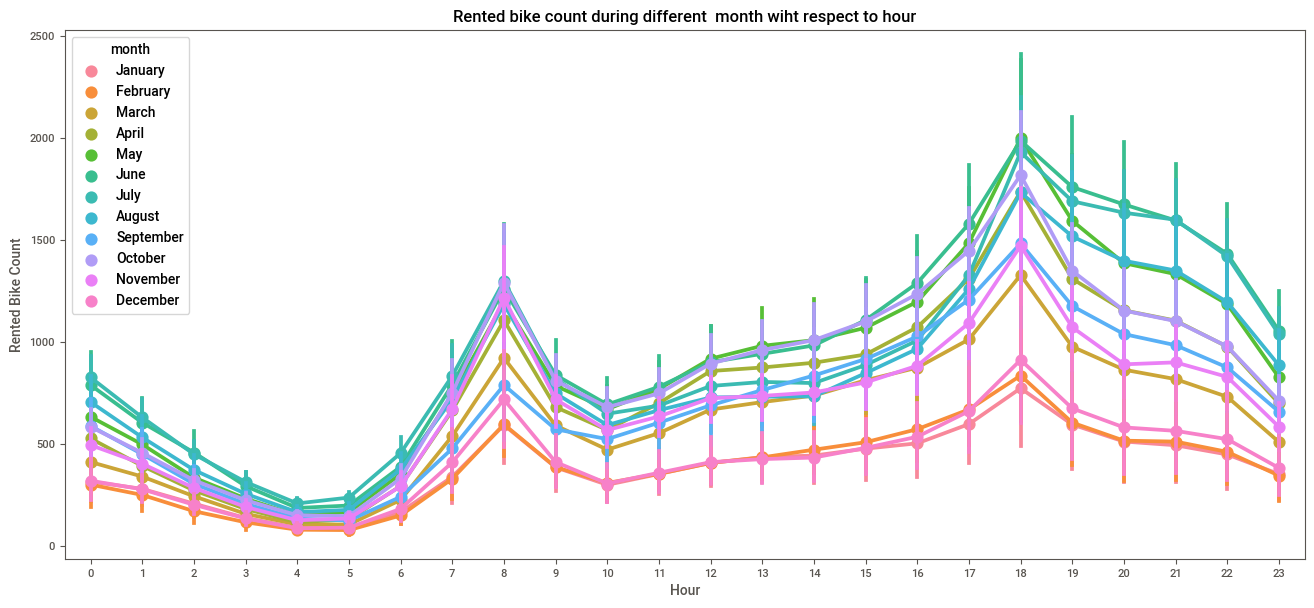

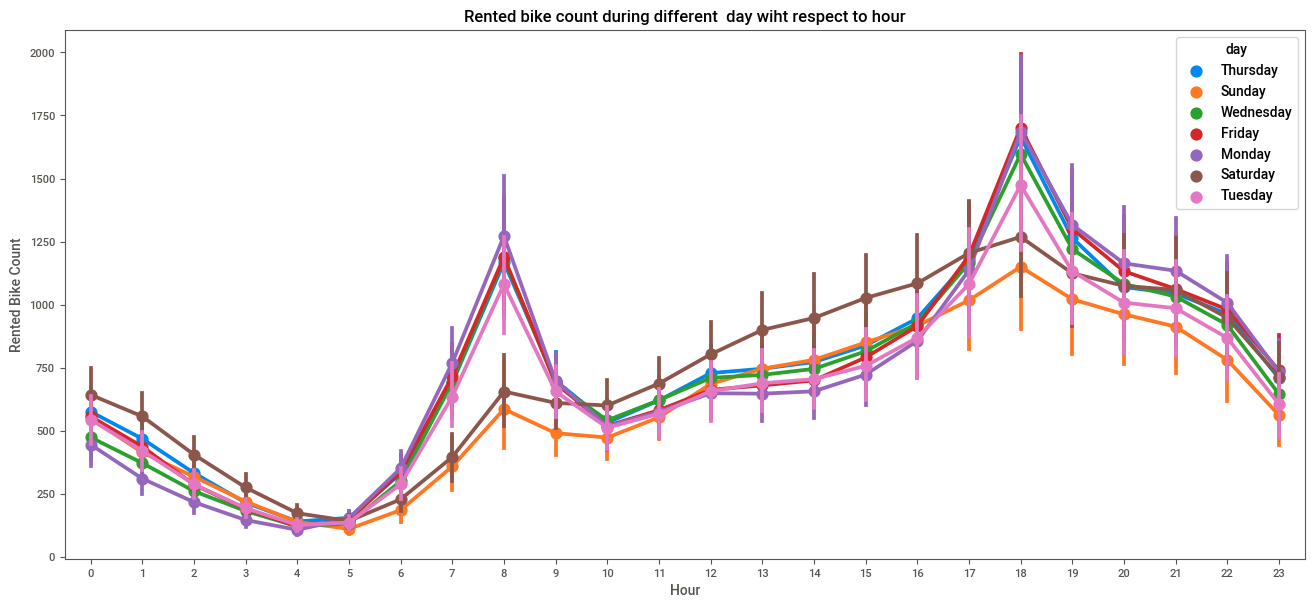

In [29]:
for col in categorical_features:
  if col == 'Hour':
    pass

  else :
    plt.figure(figsize=(16,7))
    sns.pointplot(x=bike_df['Hour'], y= bike_df['Rented Bike Count'], hue=bike_df[col])
    plt.title(f'Rented bike count during different  {col} wiht respect to hour')

plt.show()

**From above point plots we get a very good analysis such as** :=

1) **In the season column, we are able to understand that the demand for bikes is low in the winter season. and demand is quite high in summer season**.

2) **In the Holiday column, The demand is low during holidays, but in no holidays the demand is high, it may be because people use bikes to go to their work**.

3) **In the Functioning Day column, If there is no Functioning Day then there is no demand**.

4) **In 2018 demand for Rented bikes is increased as compare to 2017 year. It may be because in 2017 people are aware about rented bike facility**.

5) **In the Days of week column, We can observe from this column that the pattern of weekdays and weekends is different, in the weekend the demand becomes high in the afternoon. While the demand for office timings is high during weekdays**.

6) **In the month column, We can clearly see that the demand is low in December January & Febuary, It is cold in these months and we have already seen in season column that demand is less in winters**.

## 7) Let us do some feature engineering on Hour column for better understanding.

**Since hour column contains 0 to 23 hours data so if we divide these hourly data into sessions i.e. [ morning , afternoon, evening, night ]. then it will be better to analyze when number of bike count is maximum and minimum**.



In [30]:
def hour(h):
  
  if h >= 7 and h <=10:
    return 'Morning'

  elif h>=11 and h<=16:
    return 'Afternoon'

  elif h>=17 and h<=22:
    return 'Evening'

  else:
    return 'Night'

In [31]:
bike_df['Hour'] = bike_df['Hour'].apply(hour)

In [32]:
bike_df['Hour'].value_counts()

Night        2920
Afternoon    2190
Evening      2190
Morning      1460
Name: Hour, dtype: int64

8) **Checking if some outliers present in categroical features as wrt dependent variable**.



====================================================================== Hour ======================================================================




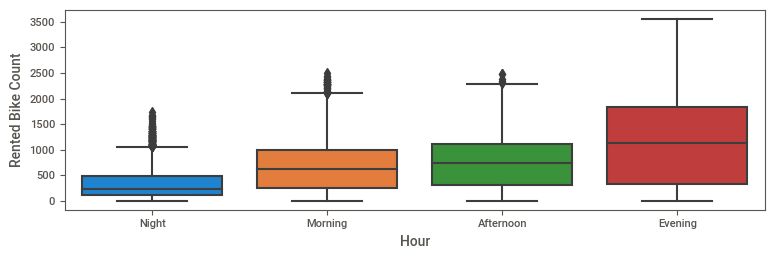



====================================================================== Seasons ======================================================================




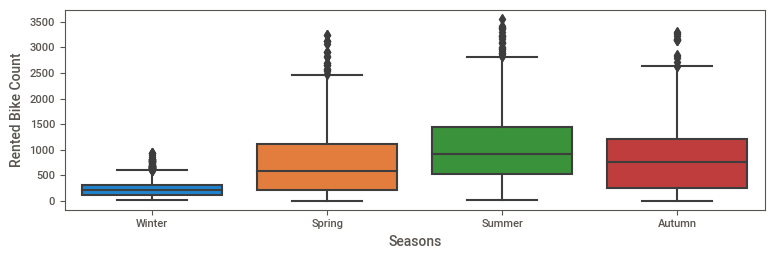



====================================================================== Holiday ======================================================================




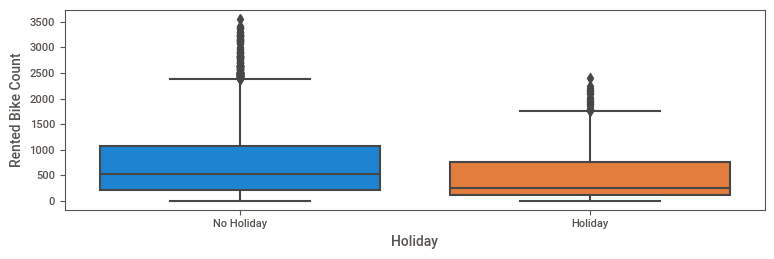



====================================================================== Functioning Day ======================================================================




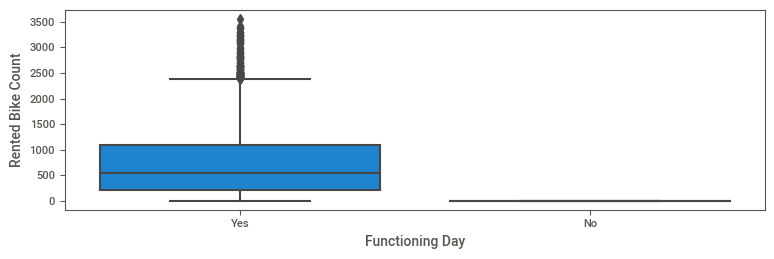



====================================================================== year ======================================================================




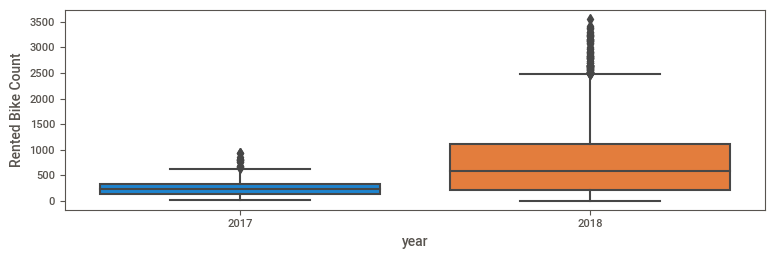



====================================================================== month ======================================================================




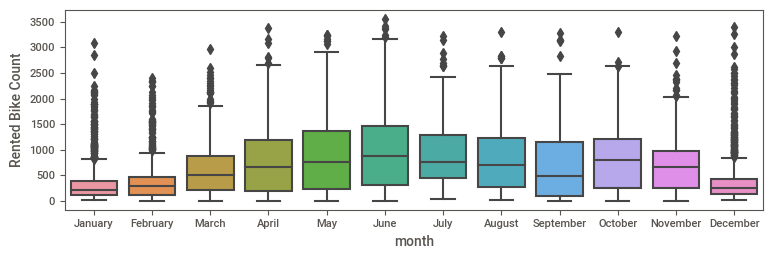



====================================================================== day ======================================================================




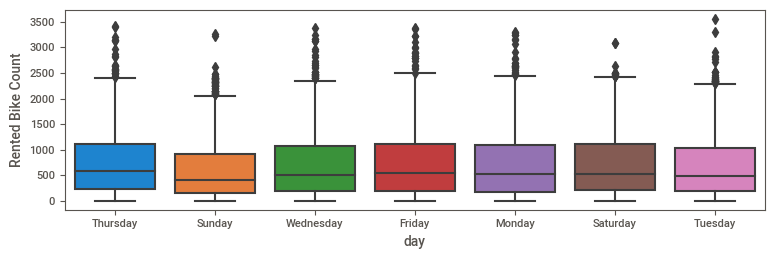

In [33]:
n=1
for i in categorical_features:
  plt.figure(figsize=(15,15))
  plt.subplot(6,2,n)
  n+=1
  print('\n')
  print('='*70,i,'='*70)
  print('\n')
  sns.boxplot(x=bike_df[i],y=bike_df["Rented Bike Count"])
  plt.tight_layout()
  plt.show()

---> **Since from above box plot we detect some outliers and by using IQR method we can also remove outliers. but here in seoul dataset we are not removing outliers because in features these outliers are not causing much sqewness to our data so we are not performing outliers removal operation**.

**NOTE** :-   Since we have seen that pattern which shows that the demand for rented bike count is high in the afternoon on the weekend. While there is more demand during office hours in weekdays.

9) - **so it is better to update day columns in terms of weekday and weekend for good observation**.

**weekdays are** = [Monday, Tuesday, Wednesday, Thursday, Friday]

**Weekend days are** = [Saturday, Sunday]


In [34]:
bike_df['week'] = bike_df['day'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [35]:
bike_df.head(2)

Rented Bike Count   Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254  Night          -5.20 %           37            2.20 %   
1                204  Night          -5.50 %           38            0.80 %   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                   -17.60 %                   0.00 %   
1              2000                   -17.60 %                   0.00 %   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  year  \
0        0.00 %         0.00 %  Winter  No Holiday             Yes  2017   
1        0.00 %         0.00 %  Winter  No Holiday             Yes  2017   

     month       day      week  
0  January  Thursday  Weekdays  
1  January  Thursday  Weekdays

**Now no need of day column in datframe so we can remove it**.

 



In [36]:
bike_df.drop(columns=['day'], inplace=True)      # Removed from Dataframe 

In [37]:
bike_df.head(2)

Rented Bike Count   Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254  Night          -5.20 %           37            2.20 %   
1                204  Night          -5.50 %           38            0.80 %   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                   -17.60 %                   0.00 %   
1              2000                   -17.60 %                   0.00 %   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  year  \
0        0.00 %         0.00 %  Winter  No Holiday             Yes  2017   
1        0.00 %         0.00 %  Winter  No Holiday             Yes  2017   

     month      week  
0  January  Weekdays  
1  January  Weekdays

In [38]:
bike_df.shape

(8760, 16)

---> **Up till now we have analysed how the categorical features are distributed in dataset**. **and how these features are relates with dependent variable.**

###10) Now Analysing Numerical Features

11) ** checking how all the numeric features are distributed in dataset by ploting distribution plot**. 

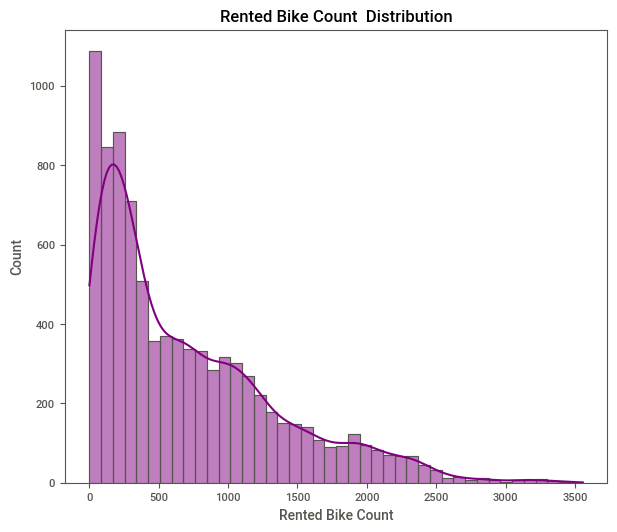

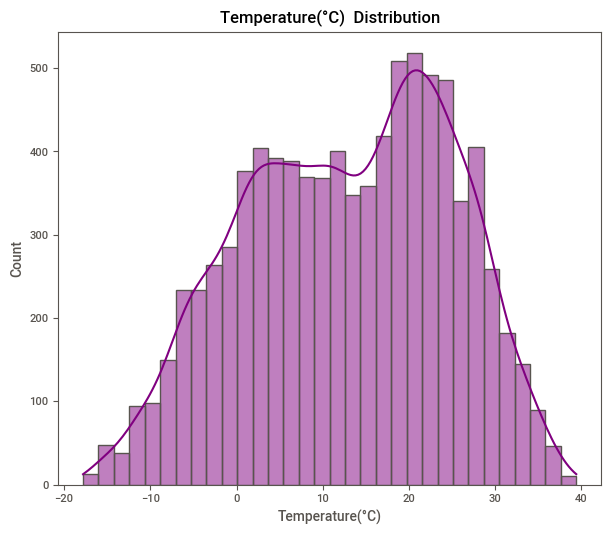

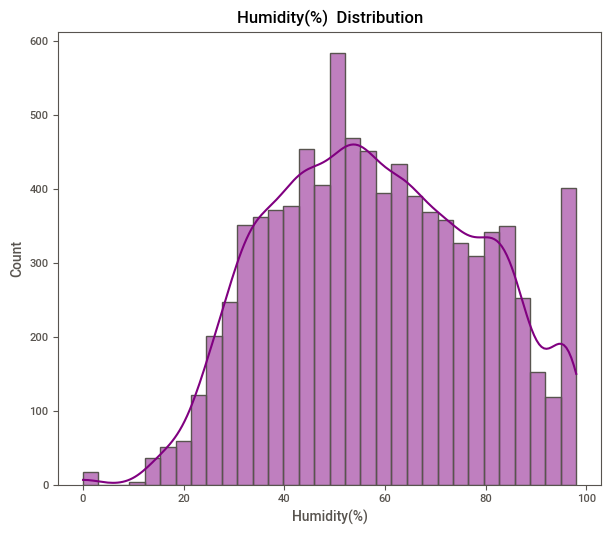

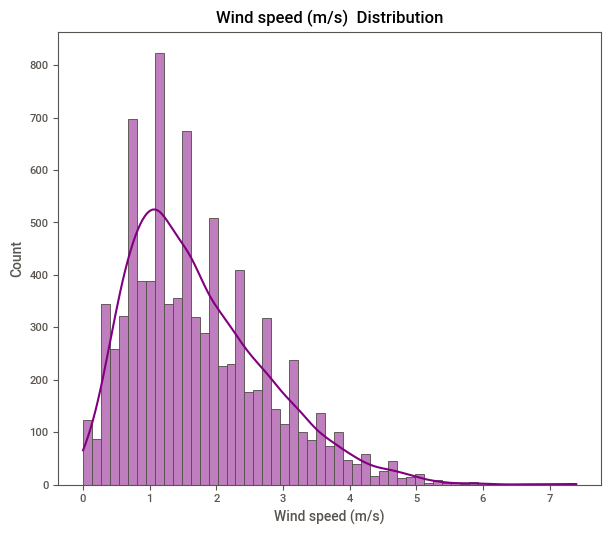

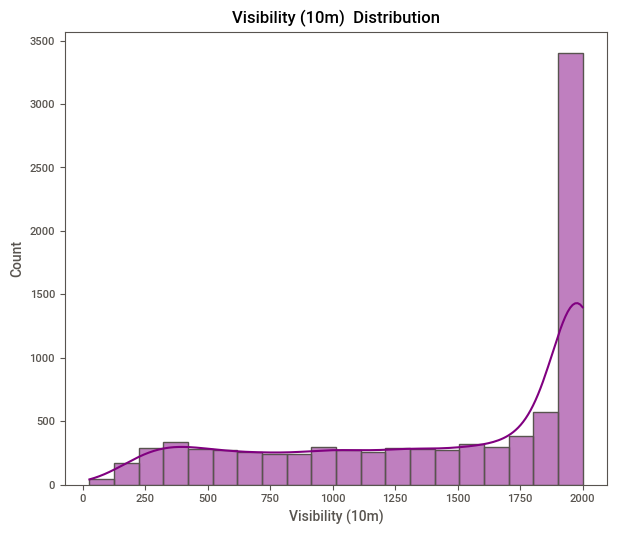

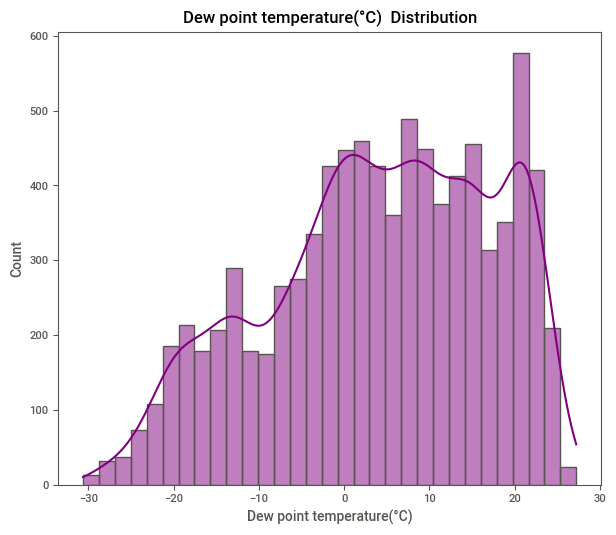

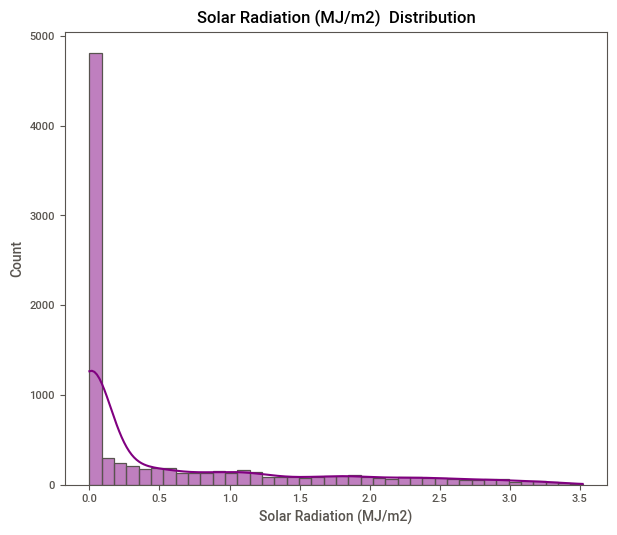

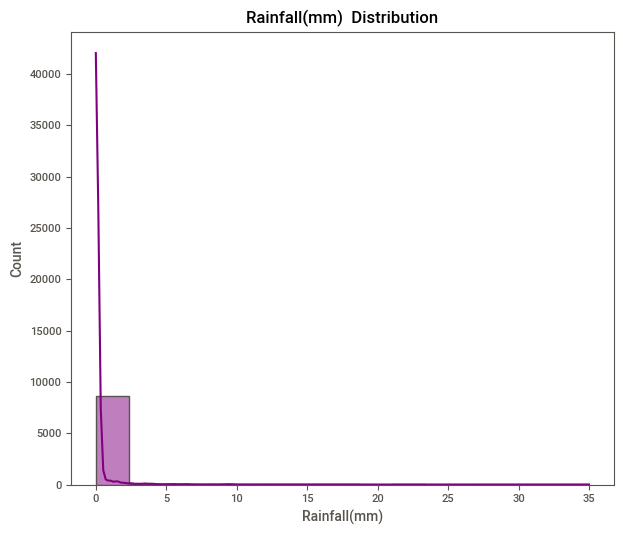

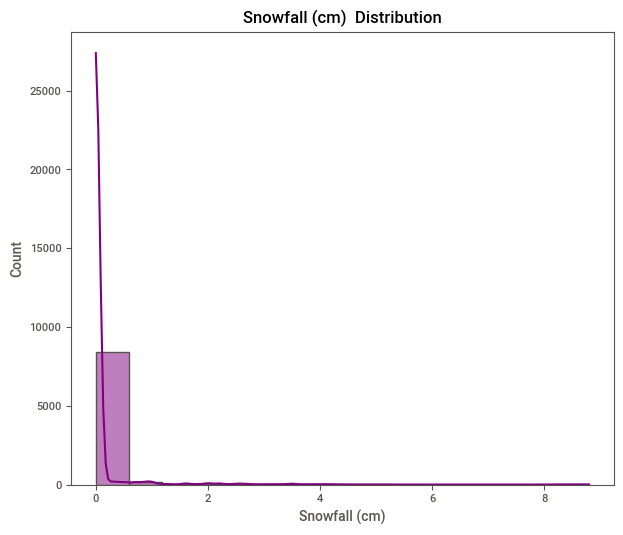

In [39]:
for col in numeric_features:
    fig = plt.figure(figsize=(7, 6))
    ax = fig.gca()
    feature = bike_df[col]
    sns.histplot(data=bike_df,x=col ,ax = ax,color='purple', kde=True)
    plt.title(col + '  Distribution')

plt.show()

---> **From the above graphs we can see that there are a lot of attributes which are positively and negatively distributed**.

**so these types of features distribution will not give better results and will not give better understanding about model**.

**so to get better result we need to normalize data by using transformations**. 



**some information about skewness** :- 

**What is skewed distribution?** :- 

---> If one tail is longer than another, the distribution is skewed. These distributions are sometimes called as symmetric or asymmetrical distributions as they don’t show any kind of symmetry. Symmetry means that one half of the distribution is a mirror image of the other half. For example, the normal distribution is a symmetric distribution with no skew. The tails are exactly the same.

1)  **Left Skewed or Negatively Skewed**:-

 ---> A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions.there ----> (Mean< Median < Mode)

2) **Right Skewed or Positively Skewed**:-

---> A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skewed distributions.. and its measure of central tendency (Mean > Median > Mode)

3) **Symmetric Distribution**:

----> A symmetric distribution is a type of distribution where the left side of the distribution mirrors the right side(Mean=Median=Mode).ex-Normal Distribution

Below are the some methods or ways to deal above types of problems :- 

here x is our dataframe.

1) **square-root for moderate skew** :- sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

2) **log for greater skew** :- log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

3) **inverse for severe skew** :- 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

4) **Linearity and heteroscedasticity** :- First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

Above methods can provide good outcomes but we have to perform different transformation for different skewed data to make normaly distributed data.

**Instead of this long process we can use power transformation on features to make them in normal distribution to give better visualisation**.

In [40]:
numeric_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

12)  **Now to check features distribution with their  mean and median so we can get better analysis of features values**.

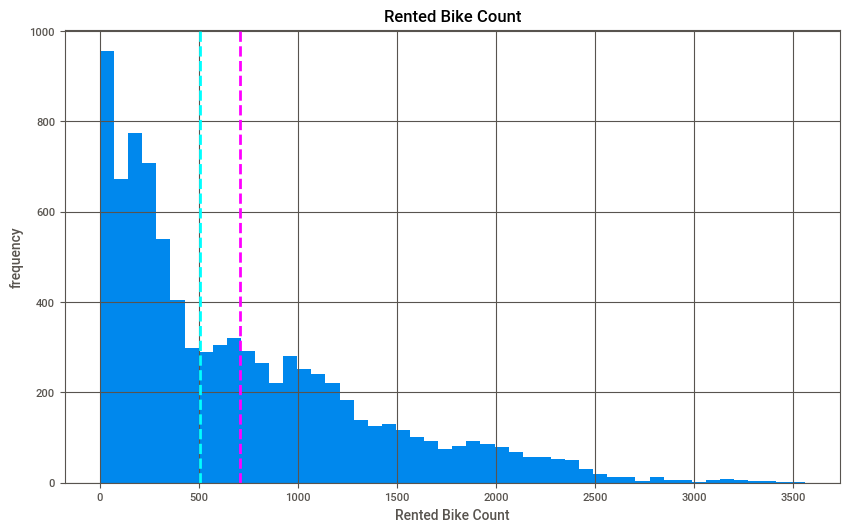

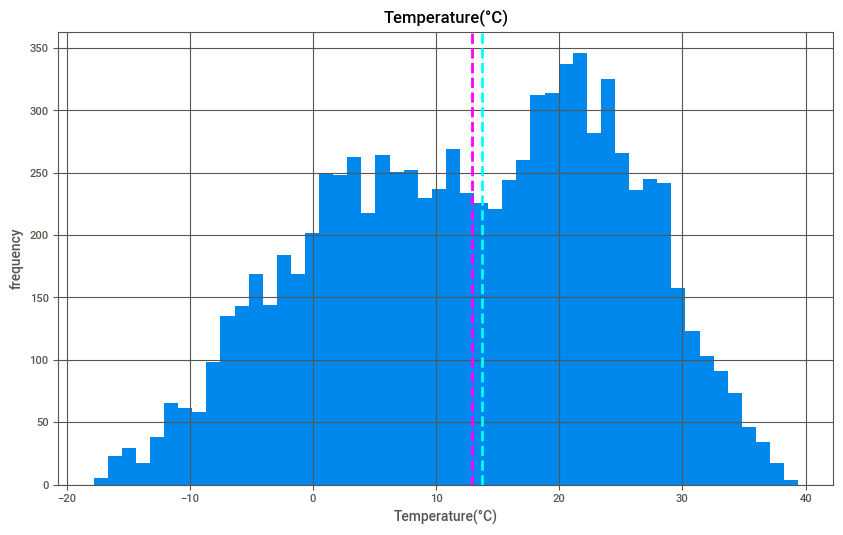

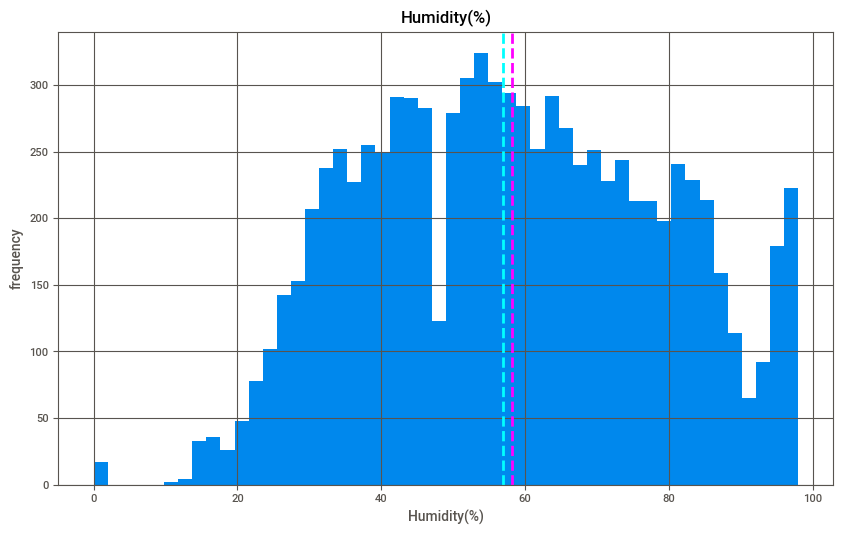

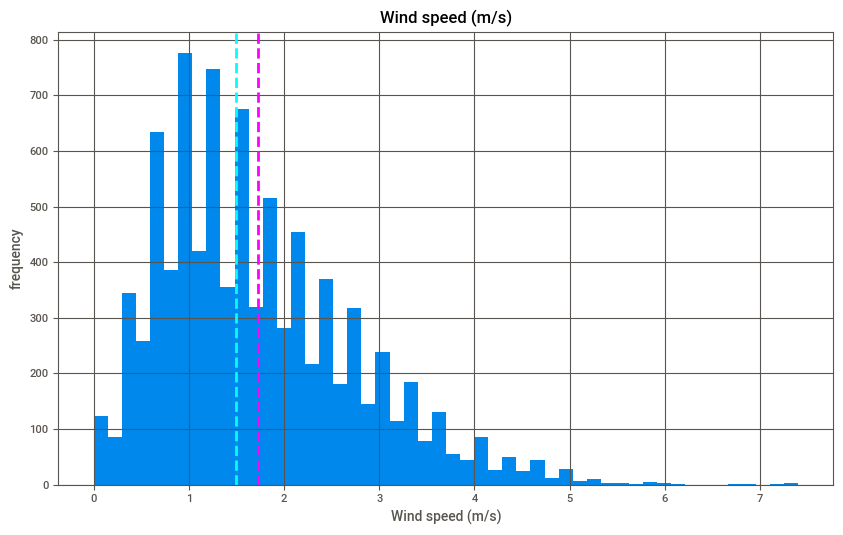

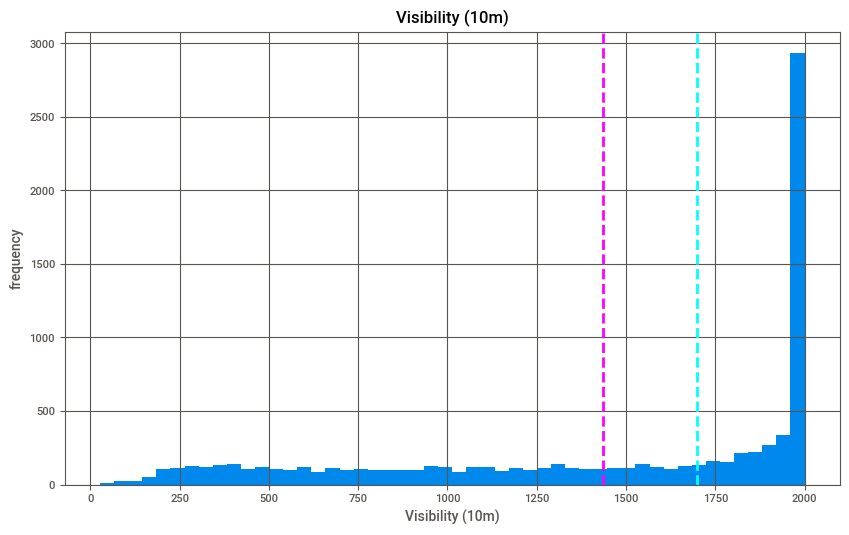

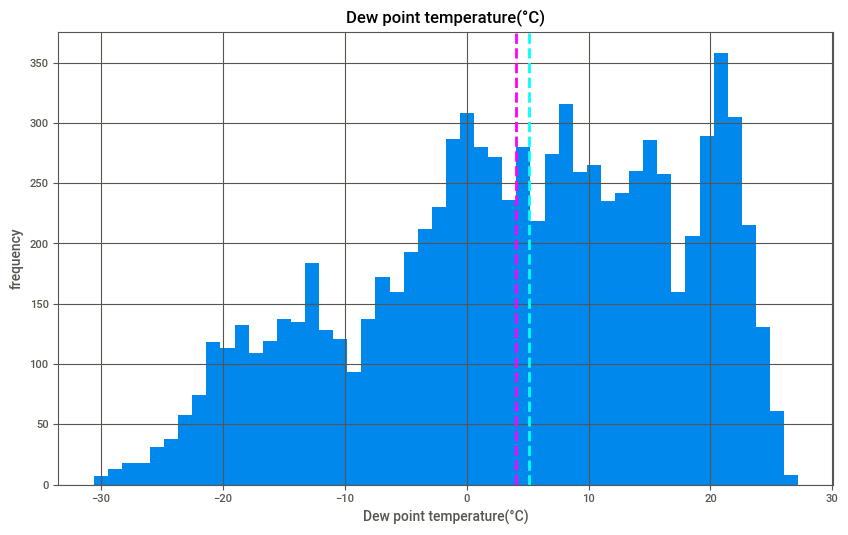

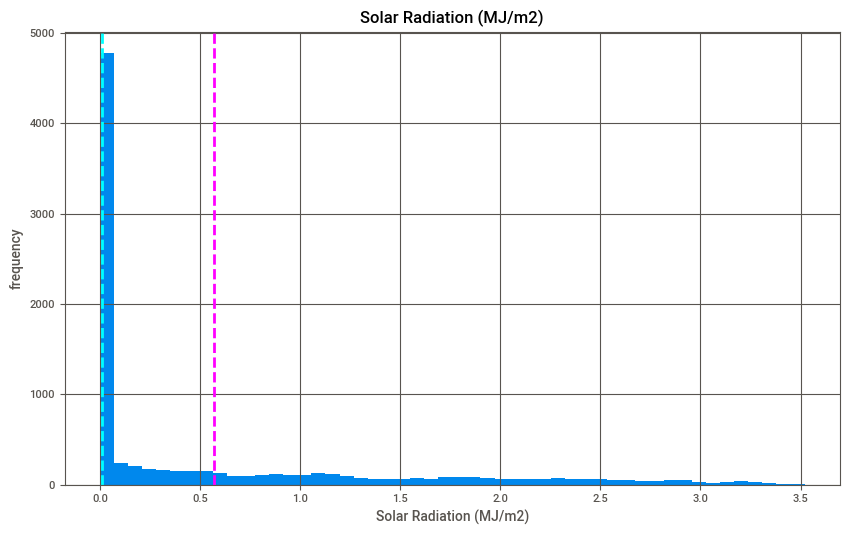

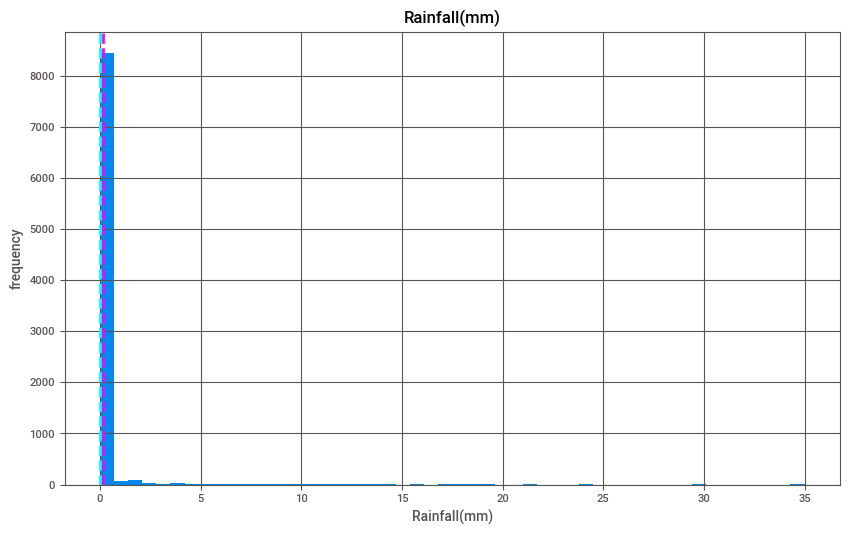

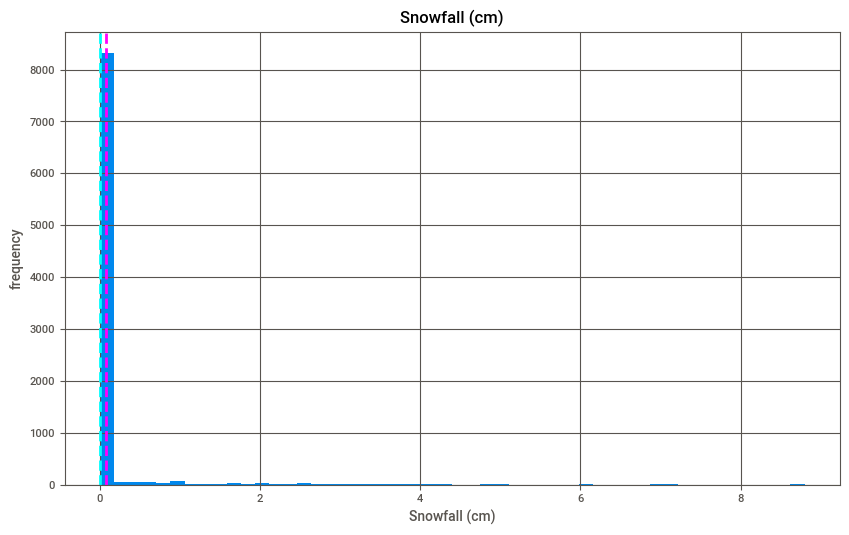

In [41]:
for col in numeric_features[:]:
  fig = plt.figure(figsize=(10,6))
  
  ax = fig.gca()                     # gca() ---> get current axis
  feature = bike_df[col]      # to transform features into normal distribution we used log10 transformation
  feature.hist(bins=50, ax=ax)          # ploting histogram
  ax.axvline(feature.mean(),color='magenta',linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='cyan',linestyle='dashed',linewidth=2) 

  ax.set_title(col)
  ax.set_ylabel('frequency')
  ax.set_xlabel(col)

plt.show()        

----> **From the above plot we can see that each features mean and median values**.

13) **Now to find how is the relation of numerical features with our dependent variable. we use scatter plot**.

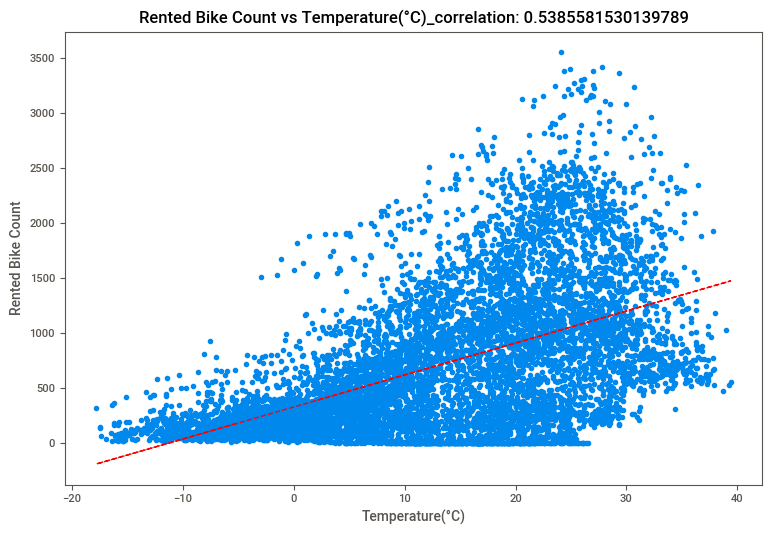

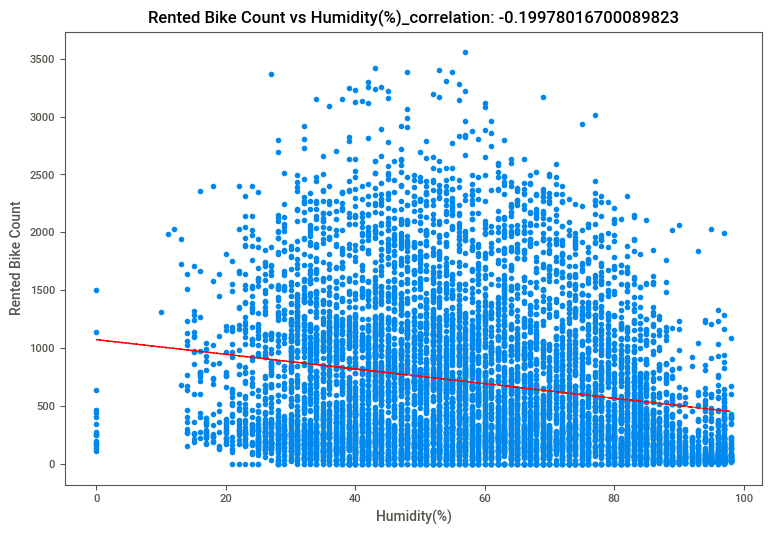

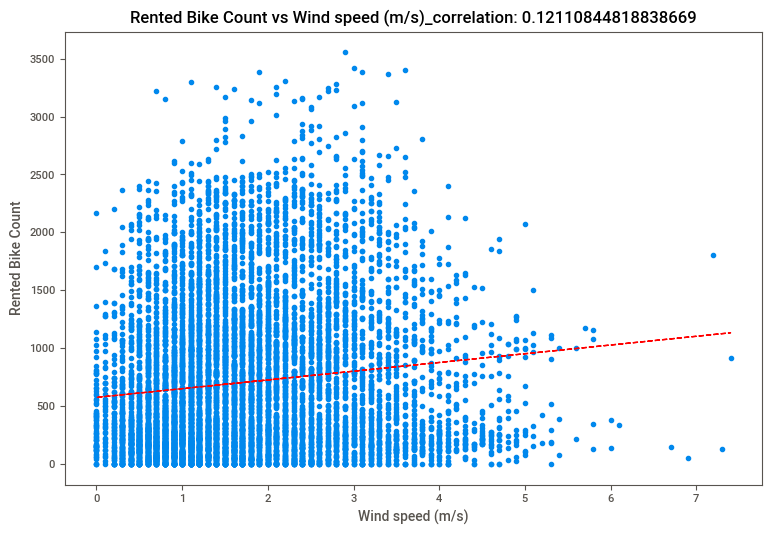

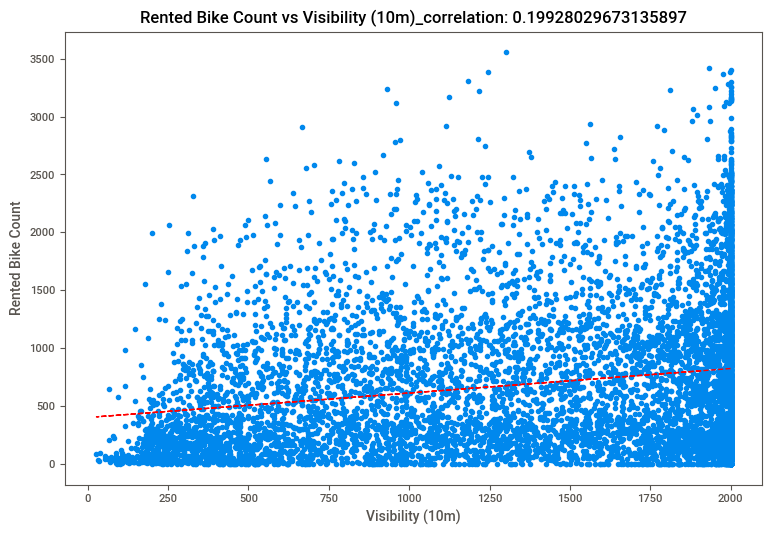

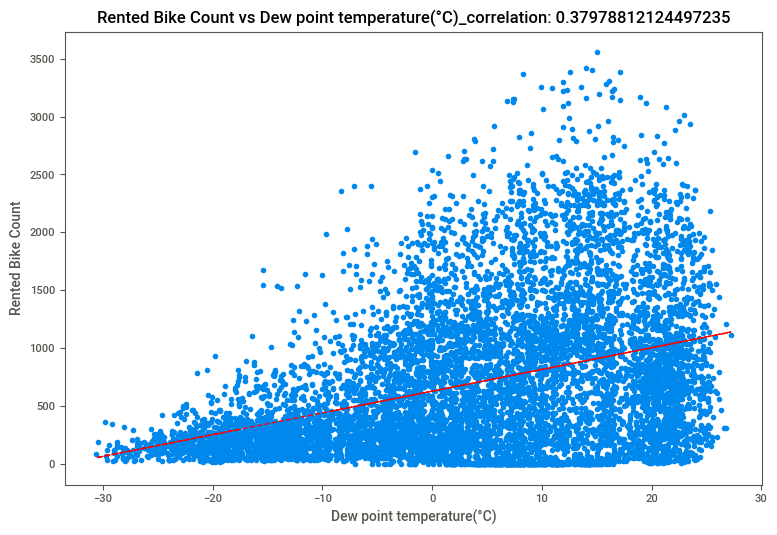

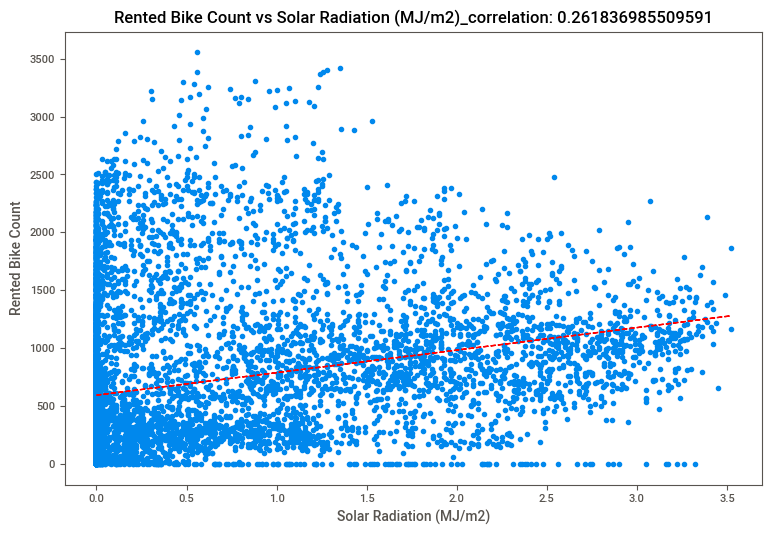

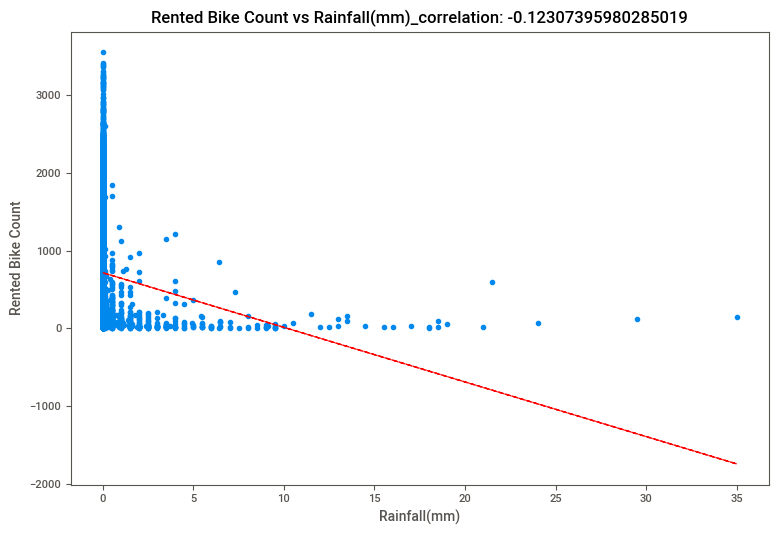

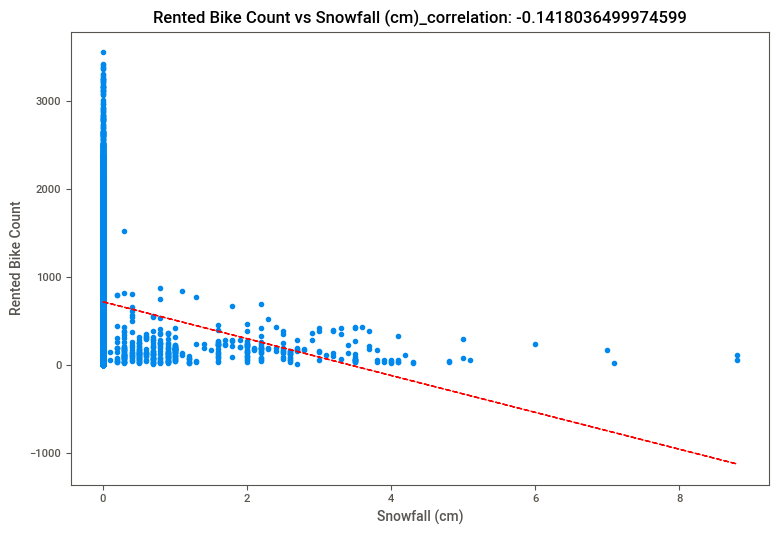

In [42]:
for col in numeric_features[1:]:    # since rented bike count column is not included in this for loop 
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = bike_df[col]
  correlation = feature.corr(bike_df['Rented Bike Count'])
  plt.scatter(x=feature, y= bike_df['Rented Bike Count'])
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')
  ax.set_title('Rented Bike Count vs '+col+ '_correlation: '+str(correlation))
  z= np.polyfit(bike_df[col],bike_df['Rented Bike Count'],1)
  y_hat = np.poly1d(z)(bike_df[col])
  plt.plot(bike_df[col],y_hat,'r--',lw=1)

plt.show()

---> **From above scatter plot or Regression plot shows some numeric features has positive correlation with dependent variable and some has negative correlation**

**correlation of features with dependent feature** :--

**positive correlation** = Temperature, wind speed, Visibility, Dew point temperature, solar radiation.

**negative correlation** = Humidity, Rainfall, snowfall



14)** Treating Outliers of features by using Boxplot to get better observation**. 

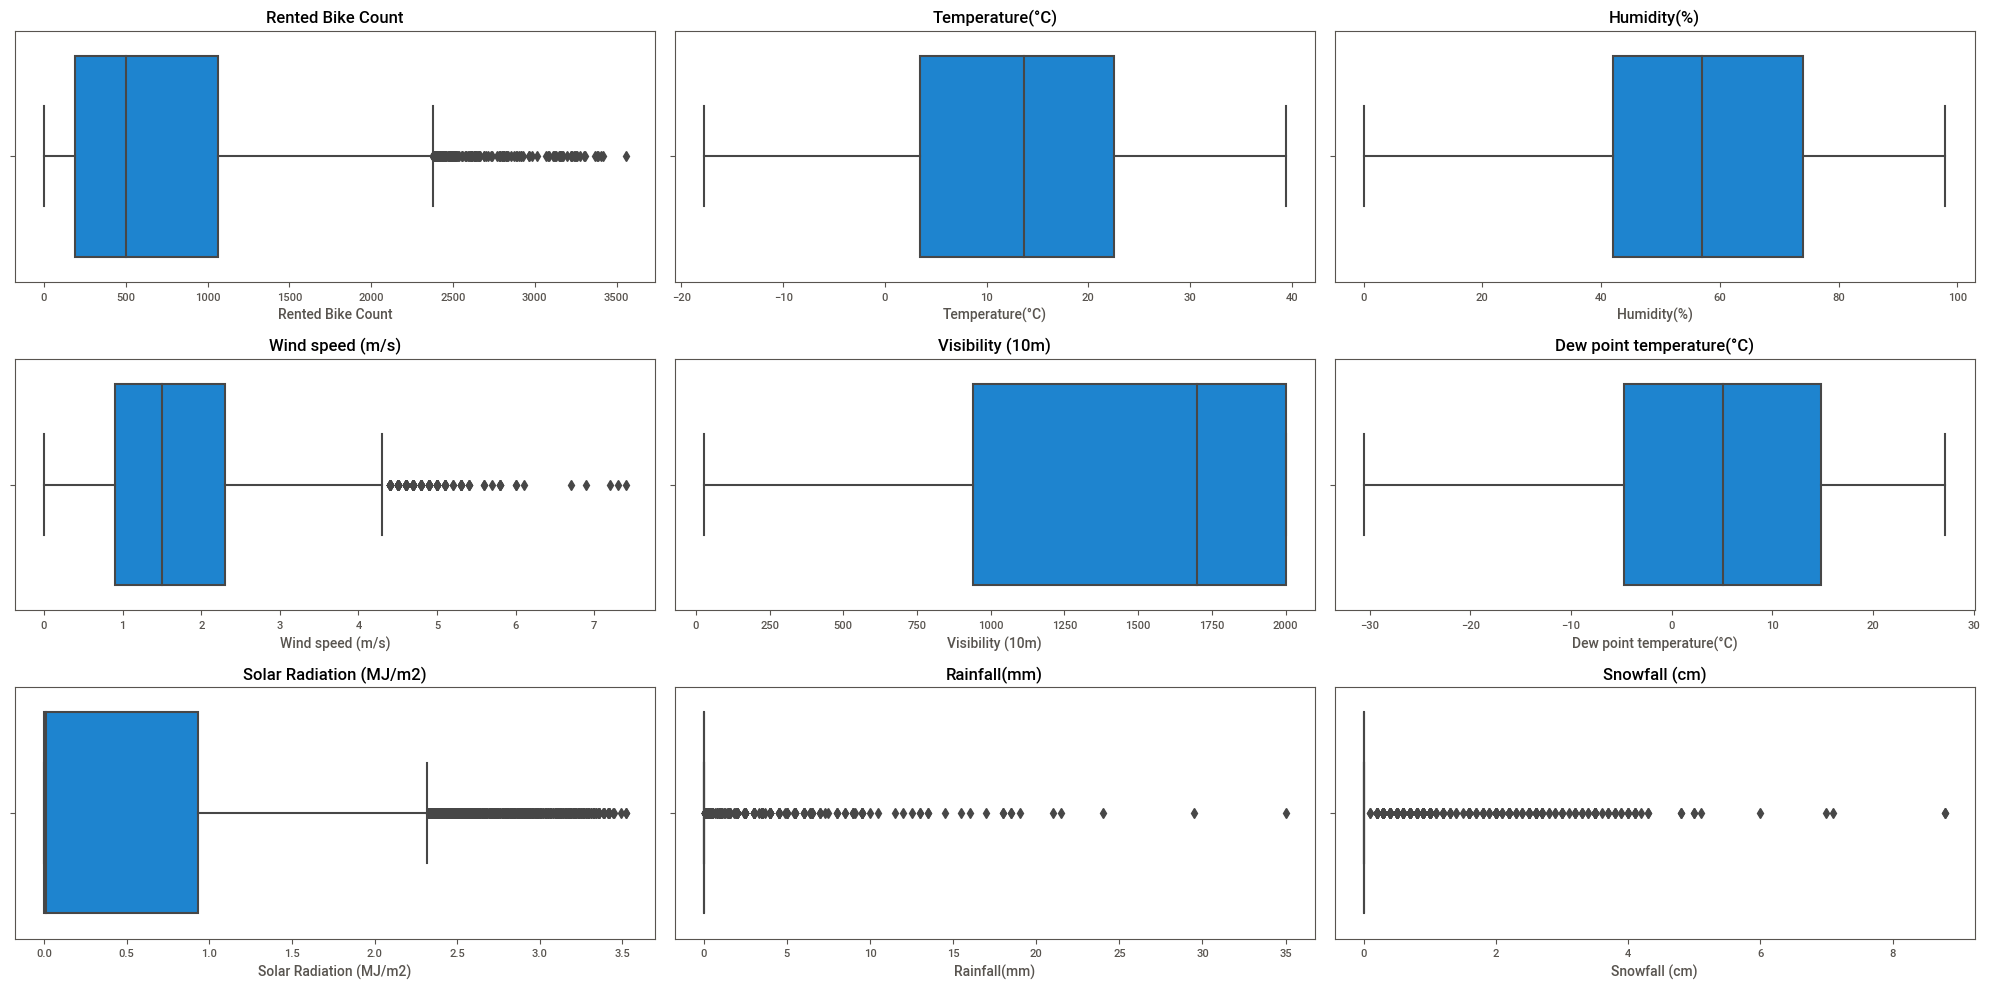

In [43]:
n = 1
plt.figure(figsize=(20,10))

for i in numeric_features[:]:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(bike_df[i])
  plt.title(i)
  plt.tight_layout()

**---> Since by point (13) and (14) we see that regression line of numeric features and dependent feature shows good approximation. and outliers of features are not affecting so much so no need to perform outliers removal method**

15) **Now to know how the coorelation of numeric features present in data**.

In [44]:
bike_df.corr()

Rented Bike Count  Temperature(°C)  Humidity(%)  \
Rented Bike Count                     1.00 %           0.54 %      -0.20 %   
Temperature(°C)                       0.54 %           1.00 %       0.16 %   
Humidity(%)                          -0.20 %           0.16 %       1.00 %   
Wind speed (m/s)                      0.12 %          -0.04 %      -0.34 %   
Visibility (10m)                      0.20 %           0.03 %      -0.54 %   
Dew point temperature(°C)             0.38 %           0.91 %       0.54 %   
Solar Radiation (MJ/m2)               0.26 %           0.35 %      -0.46 %   
Rainfall(mm)                         -0.12 %           0.05 %       0.24 %   
Snowfall (cm)                        -0.14 %          -0.22 %       0.11 %   

                           Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count                    0.12 %            0.20 %   
Temperature(°C)                     -0.04 %            0.03 %   
Humidity(%)                         -0.34 %           -0.54 %   
Wind speed (m/s)                     1.00 %            0.17 %   
Visibility (10m)                     0.17 %            1.00 %   
Dew point temperature(°C)           -0.18 %           -0.18 %   
Solar Radiation (MJ/m2)              0.33 %            0.15 %   
Rainfall(mm)                        -0.02 %           -0.17 %   
Snowfall (cm)                       -0.00 %           -0.12 %   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                             0.38 %                   0.26 %   
Temperature(°C)                               0.91 %                   0.35 %   
Humidity(%)                                   0.54 %                  -0.46 %   
Wind speed (m/s)                             -0.18 %                   0.33 %   
Visibility (10m)                             -0.18 %                   0.15 %   
Dew point temperature(°C)                     1.00 %                   0.09 %   
Solar Radiation (MJ/m2)                       0.09 %                   1.00 %   
Rainfall(mm)                                  0.13 %                  -0.07 %   
Snowfall (cm)                                -0.15 %                  -0.07 %   

                           Rainfall(mm)  Snowfall (cm)  
Rented Bike Count               -0.12 %        -0.14 %  
Temperature(°C)                  0.05 %        -0.22 %  
Humidity(%)                      0.24 %         0.11 %  
Wind speed (m/s)                -0.02 %        -0.00 %  
Visibility (10m)                -0.17 %        -0.12 %  
Dew point temperature(°C)        0.13 %        -0.15 %  
Solar Radiation (MJ/m2)         -0.07 %        -0.07 %  
Rainfall(mm)                     1.00 %         0.01 %  
Snowfall (cm)                    0.01 %         1.00 %

16) **Ploting Heatmap to get better visualization about features correlation**

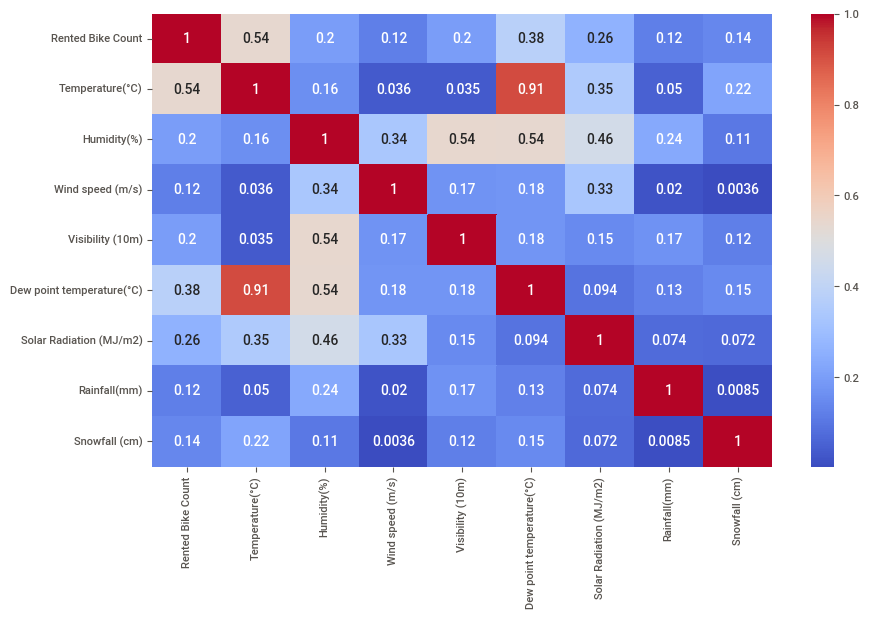

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(abs(bike_df.corr()), cmap='coolwarm', annot=True)    # abs = for absolute to avoid negative correlated values.

**From this graph we are able to see that there is multicollinearity in temperature(°C) and dev point temperature(°C) column**.

**so we need to remove multicollinearity because** :- 
**Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of our regression model**.

17) **Removing multicollinearity**

**To remove multicollinearity we use VIF method** 

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [47]:
# Since rented bike count column is our dependent feature.

calc_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables    VIF
0          Temperature(°C) 3.17 %
1              Humidity(%) 4.76 %
2         Wind speed (m/s) 4.08 %
3         Visibility (10m) 4.41 %
4  Solar Radiation (MJ/m2) 2.25 %
5             Rainfall(mm) 1.08 %
6            Snowfall (cm) 1.12 %

---> **Since VIF ( Variance inflation factor ) in general, a VIF above 10 indicates high correlation and is cause for concern**.

**If VIF  <=3 means variables are less  correlated and multicollinearity does not exist in the regression model**. 

**So in our data features are less correlated with each other so it does not causes more concern** 

In [48]:
bike_df.head(2)

Rented Bike Count   Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254  Night          -5.20 %           37            2.20 %   
1                204  Night          -5.50 %           38            0.80 %   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                   -17.60 %                   0.00 %   
1              2000                   -17.60 %                   0.00 %   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  year  \
0        0.00 %         0.00 %  Winter  No Holiday             Yes  2017   
1        0.00 %         0.00 %  Winter  No Holiday             Yes  2017   

     month      week  
0  January  Weekdays  
1  January  Weekdays

In [49]:
bike_df.shape

(8760, 16)

18) **Now handeling categorical features by feature encoding **

i.e. **using one hot encoding (get dummies) or Data encoding method**.

**Since performing feature encoding on** = [ Hour, Seasons, Holiday, Functioning Day, Month, Week ]

In [50]:
# Creating New data frame

new_bike_df = pd.get_dummies(bike_df, drop_first=True, sparse=True)

In [51]:
new_bike_df.head(2)

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254          -5.20 %           37            2.20 %   
1                204          -5.50 %           38            0.80 %   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                   -17.60 %                   0.00 %   
1              2000                   -17.60 %                   0.00 %   

   Rainfall(mm)  Snowfall (cm)  Hour_Evening  ...  month_February  \
0        0.00 %         0.00 %             0  ...               0   
1        0.00 %         0.00 %             0  ...               0   

   month_January  month_July  month_June  month_March  month_May  \
0              1           0           0            0          0   
1              1           0           0            0          0   

   month_November  month_October  month_September  week_Weekend  
0               0              0                0             0  
1               0              0                0             0  

[2 rows x 30 columns]

In [52]:
new_bike_df.shape

(8760, 30)

## Model implementation

19)  **Since we know our Dependent feature is positivley skewed so for the better model prediction we have to Normalize it**.

-> **as we discussed some methods to normalize data in point (10**) 

**Method 1)  Log transformation**  = 

Text(0.5, 1.0, 'Rented Bike Count by log_10 transformation')

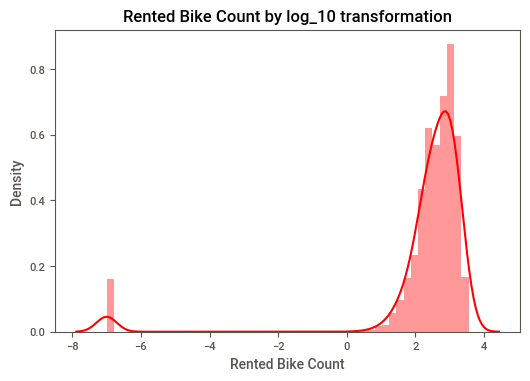

In [53]:
# method 1) Log transformation
sns.distplot(np.log10(new_bike_df['Rented Bike Count']+0.0000001),color='red').set_title("Rented Bike Count by log_10 transformation")

Method 2) **square transformation method** =

Text(0.5, 1.0, 'Rented Bike count by square trnasformation')

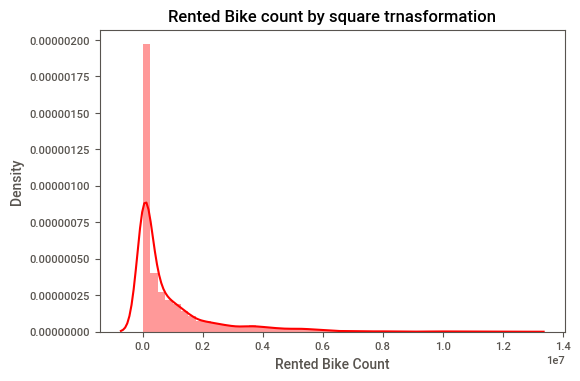

In [54]:
sns.distplot((new_bike_df['Rented Bike Count']**2), color='red').set_title('Rented Bike count by square trnasformation')

Method 3) **Square root transformation** = 

Text(0.5, 1.0, 'Rented Bike count by square root transformation')

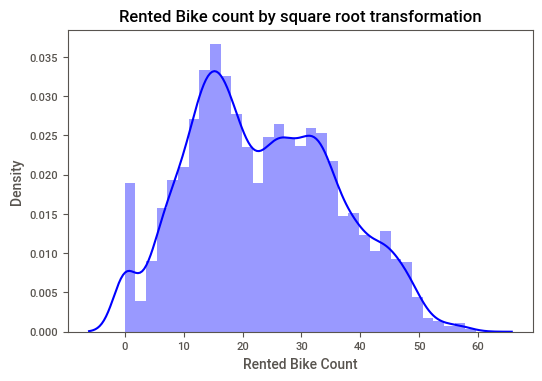

In [55]:
sns.distplot(np.sqrt(new_bike_df['Rented Bike Count']), color= 'blue').set_title('Rented Bike count by square root transformation')

----> So by comparing above three transformation methods we clearly see that **sqrt transformation** on dependent feature gives normal distribution.

20)  - **Dividing data for model building**.

( a ) :- **independent feature** = x = all features except "Rented bike count"

In [56]:
x= new_bike_df.drop(columns=['Rented Bike Count'])

In [57]:
x.head()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0          -5.20 %           37            2.20 %              2000   
1          -5.50 %           38            0.80 %              2000   
2          -6.00 %           39            1.00 %              2000   
3          -6.20 %           40            0.90 %              2000   
4          -6.00 %           36            2.30 %              2000   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                   -17.60 %                   0.00 %        0.00 %   
1                   -17.60 %                   0.00 %        0.00 %   
2                   -17.70 %                   0.00 %        0.00 %   
3                   -17.60 %                   0.00 %        0.00 %   
4                   -18.60 %                   0.00 %        0.00 %   

   Snowfall (cm)  Hour_Evening  Hour_Morning  ...  month_February  \
0         0.00 %             0             0  ...               0   
1         0.00 %             0             0  ...               0   
2         0.00 %             0             0  ...               0   
3         0.00 %             0             0  ...               0   
4         0.00 %             0             0  ...               0   

   month_January  month_July  month_June  month_March  month_May  \
0              1           0           0            0          0   
1              1           0           0            0          0   
2              1           0           0            0          0   
3              1           0           0            0          0   
4              1           0           0            0          0   

   month_November  month_October  month_September  week_Weekend  
0               0              0                0             0  
1               0              0                0             0  
2               0              0                0             0  
3               0              0                0             0  
4               0              0                0             0  

[5 rows x 29 columns]

but since as we above discussed that Temperature and Dew point temperature is highly correlated so for the repetation of feature in model building causes extra time so we will drop Dew point temperature column from independent features.

In [58]:
x= x.drop(columns=['Dew point temperature(°C)'])

In [59]:
x.head(2)

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0          -5.20 %           37            2.20 %              2000   
1          -5.50 %           38            0.80 %              2000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Hour_Evening  \
0                   0.00 %        0.00 %         0.00 %             0   
1                   0.00 %        0.00 %         0.00 %             0   

   Hour_Morning  Hour_Night  ...  month_February  month_January  month_July  \
0             0           1  ...               0              1           0   
1             0           1  ...               0              1           0   

   month_June  month_March  month_May  month_November  month_October  \
0           0            0          0               0              0   
1           0            0          0               0              0   

   month_September  week_Weekend  
0                0             0  
1                0             0  

[2 rows x 28 columns]

In [60]:
x.shape

(8760, 28)

(b) :- **for Dependent Feature** = y = Rented Bike Count

In [61]:
y = np.sqrt(new_bike_df['Rented Bike Count'])

In [62]:
y.shape

(8760,)

21) **Spliting Data for Traning and Testing**

In [63]:
# Since we have Imported all the libraries at the top of notebook

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=10)

In [64]:
xtrain.head(2)          ### Gets 80% of data for training the model

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
1036          -6.40 %           46            0.80 %              1993   
302           -4.70 %           27            2.90 %              1883   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Hour_Evening  \
1036                   0.00 %        0.00 %         0.00 %             0   
302                    1.12 %        0.00 %         0.00 %             0   

      Hour_Morning  Hour_Night  ...  month_February  month_January  \
1036             0           1  ...               0              1   
302              0           0  ...               0              0   

      month_July  month_June  month_March  month_May  month_November  \
1036           0           0            0          0               0   
302            0           0            0          0               0   

      month_October  month_September  week_Weekend  
1036              0                0             1  
302               0                0             0  

[2 rows x 28 columns]

In [65]:
xtrain.shape

(7008, 28)

In [66]:
xtest.head(2)              ### Gets 20% of Data for testing the model

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
389           -9.70 %           41            3.10 %              2000   
8461           9.90 %           37            2.10 %              1900   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Hour_Evening  \
389                    0.00 %        0.00 %         0.00 %             0   
8461                   1.32 %        0.00 %         0.00 %             0   

      Hour_Morning  Hour_Night  ...  month_February  month_January  \
389              0           1  ...               0              0   
8461             0           0  ...               0              0   

      month_July  month_June  month_March  month_May  month_November  \
389            0           0            0          0               0   
8461           0           0            0          0               1   

      month_October  month_September  week_Weekend  
389               0                0             1  
8461              0                0             1  

[2 rows x 28 columns]

In [67]:
xtest.shape

(1752, 28)

In [68]:
ytrain.head()

1036    6.86 %
302    15.49 %
6773   12.85 %
6354   50.28 %
5784   28.46 %
Name: Rented Bike Count, dtype: float64

In [69]:
ytrain.shape

(7008,)

In [70]:
ytest.head()

389     5.57 %
8461   30.08 %
3588   37.08 %
5086   33.27 %
3366   20.35 %
Name: Rented Bike Count, dtype: float64

In [71]:
ytest.shape

(1752,)

22) - **Creating a functions to train and evaluate the model with different parameters like MSE , RMSE, R2 Score, Best_params, Best score, Coefficient , intercept and feature importances**

In [72]:
# Appending all models parameters to the corrosponding list
mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model
    
  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:
      # finding the best parameters of the model if any 
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    pass
    

  #predicting the Test set and evaluting the models 

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')
  
  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    try:
      
      # ploting the graph of feature importance
      
      best = model.best_estimator_
      features = X_train.columns
      importances = best.feature_importances_
      indices = np.argsort(importances)
      plt.figure(figsize=(10,15))
      plt.title('Feature Importance')
      plt.barh(range(len(indices)), importances[indices], color='red', align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Relative Importance')
      plt.show()
    
    except:
      pass
  
  # Here we appending the parameters for all models 
  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values  
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass



## 22) Model (1) -= **Building a Linear Regression model**

Training score  = 0.7031168479271276
MAE : 5.256832985963903
MSE : 44.35376150715583
RMSE : 6.659861973581422
R2 : 0.7161594175703074
Adjusted R2 :  0.7115468021854953 

********************************************************************************
coefficient 
 [ 5.14940824e-01 -1.60847945e-01  1.58427497e-01  4.73815016e-04
 -4.10264161e-01 -1.53176051e+00  1.92997496e-01  7.31743738e+00
  3.49826484e+00 -3.20286654e+00 -2.99804972e+00 -3.65497680e+00
 -7.77576392e+00  2.71595480e+00  2.80909776e+01 -2.32980211e+00
 -8.22718544e-01  1.64703992e-01 -4.94031472e-01  4.38354159e-01
 -1.80821191e-01  4.28441282e+00  3.96743044e-01  1.72452283e+00
  6.05512430e-01  2.08197536e+00 -4.89976098e-02 -6.51584135e-01]


Intercept  =  -0.19119801675653747


******************** ploting the graph of Actual and predicted only with 80 observation ********************


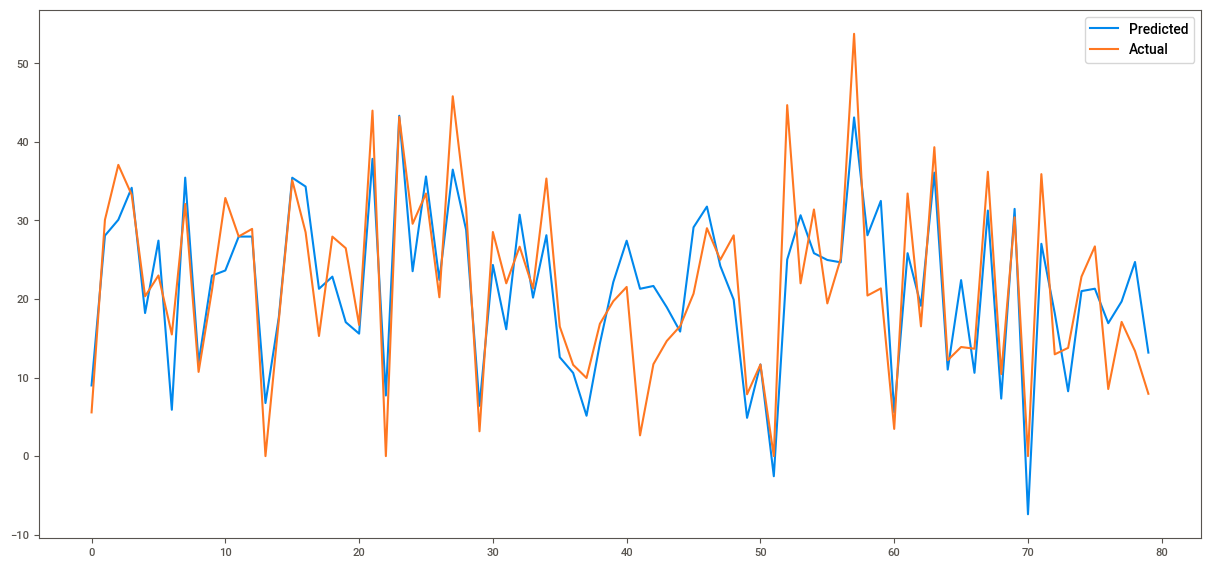

In [73]:
# we have imported linerar reg model at the top 
score_metrix(LinearRegression(), xtrain, xtest, ytrain, ytest)

----> Above linear regression model shows quite good results.

----> **By observing training score we say that model is quite overfit**. 

----> We can increase accuracy of model by scaling or transforming the training data by either min max scaler or standard scalar or Power transformer.

**Power transformations are very useful when we have to deal with skewed features and our model is sensitive to the symmetry of the distributions**.

**The fit(data) method is used to compute the mean and std dev for a given feature to be used further for scaling**. **The transform(data) method is used to perform scaling using mean and std dev calculated using the** . **fit() method**.

 **The fit_transform() method does both fits and transform**

In [74]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
xtrain_trans = pt.fit_transform(xtrain)      # fit transform the training set
xtest_trans = pt.transform(xtest)             #tranform the test set

Training score  = 0.7358707972413249
MAE : 5.062774637284665
MSE : 41.52977444529123
RMSE : 6.44435989414707
R2 : 0.73423143908948
Adjusted R2 :  0.729912507165223 

********************************************************************************
coefficient 
 [ 5.61822803e+00 -1.87825798e+00  1.92424550e-01  3.52738715e-01
  7.77994109e-01 -3.15126857e+00  1.61361164e-01  3.70269979e+00
  1.29995677e+00 -1.06490861e+00 -1.24617734e+00 -1.47237748e+00
 -3.38114045e+00  5.81846210e-01  5.09717798e+00 -5.45365806e-01
 -2.95892271e-01  1.14990091e-02 -1.93466504e-01  2.17226406e-03
 -2.89652266e-01  1.03408433e+00 -1.35548401e-01  4.57829697e-01
  2.31829971e-02  3.82541530e-01 -5.31337743e-02 -3.49686409e-01]


Intercept  =  23.598336127191143


******************** ploting the graph of Actual and predicted only with 80 observation ********************


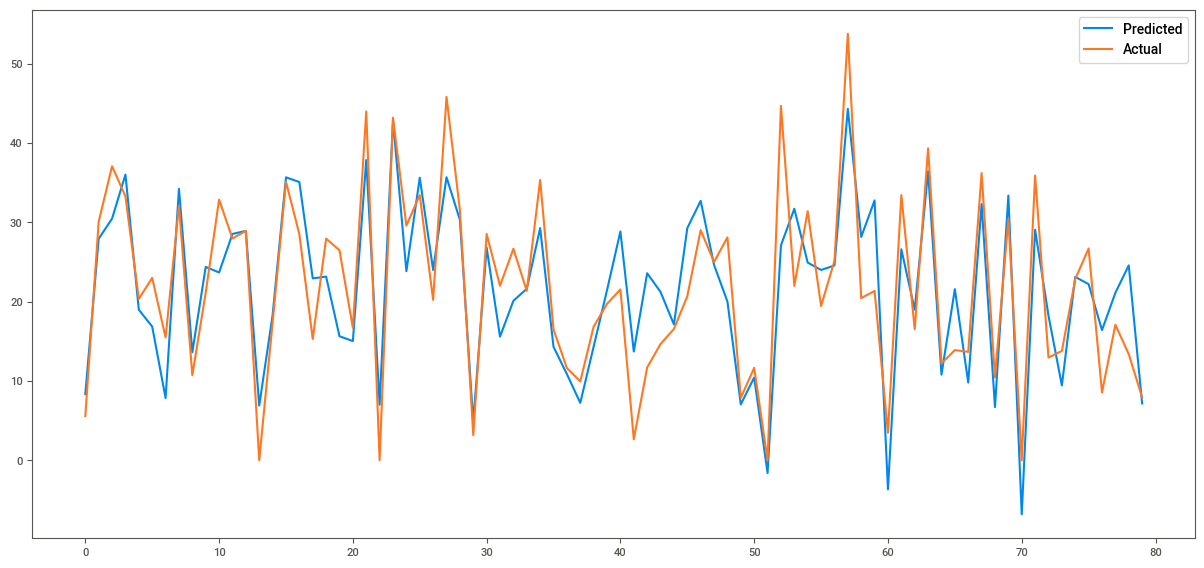

In [75]:
score_metrix(LinearRegression(), xtrain_trans, xtest_trans, ytrain, ytest)

----> **As by power transformer operation we have increased our training accuracy by some percent**.

## Model (2) -= **Building Linear Regression model by using polynomial features**

**we can increase traning accuracy by increasing degree of polynomials**.

In [76]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)                               #creating variable with degree 2
poly_xtrain = poly.fit_transform(xtrain_trans)                # fit the train set
poly_xtest = poly.transform(xtest_trans)                    #transform the test set

Training score  = 0.8514176478921974
MAE : 3.7037638918076135
MSE : 24.62886174549538
RMSE : 4.962747398920822
R2 : 0.8423883290869492
Adjusted R2 :  0.7902902463763283 

********************************************************************************
coefficient 
 [ 3.94145628e+07  3.80508071e+00 -2.24541860e+00  2.07718987e-01
  9.06363906e-02 -8.17189020e-01  1.57283721e+00  3.55873883e+10
  1.37983606e+11  1.07720394e+11  1.10943653e+11 -1.54865270e+11
 -1.08124520e+10  4.05321146e+10 -1.31909324e+11  2.70854399e+09
  6.27033400e+10  2.39340762e+10  7.32963714e+09 -8.53410827e+10
  1.26660010e+11  2.30371039e+10  5.95157392e+10 -6.11998294e+10
  6.55737937e+09 -1.77946860e+10 -1.57501202e+10  4.97296836e+10
  7.14602917e+09 -2.86756312e+00  4.25702253e-01 -7.71826667e-02
  6.52730939e-01  4.62142944e-01 -5.52787781e-02 -1.07999325e+00
  1.31884766e+00 -1.44703293e+00 -3.33534241e-01 -4.28353310e-01
 -2.06568909e+00 -4.51145744e+00 -1.26167297e+00  2.72980785e+00
  3.45422745e-01 -9

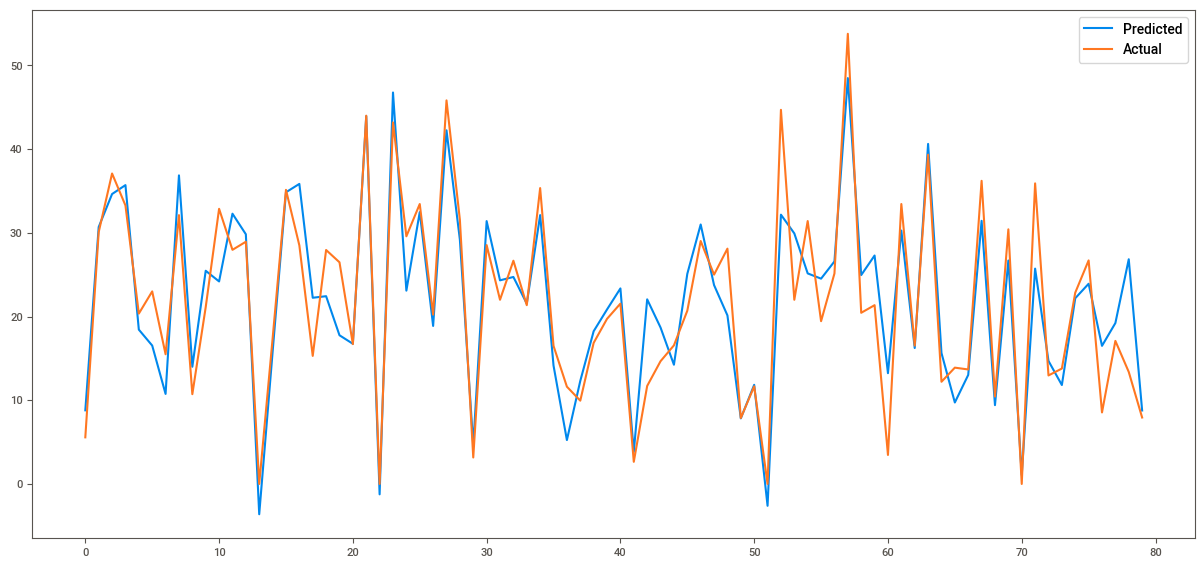

In [77]:
score_metrix(LinearRegression(), poly_xtrain,poly_xtest,ytrain,ytest)

## 23) **Regularization** -:

**Regularization is one of the most important concepts of machine learning. It is a technique to prevent the model from overfitting by adding extra information to it**.

**Two techniques of regularization are = 1) Lasso (l1 norm) and 2) Ridge regression (L2 norm)**

##Model (3) -= lasso regression 

In [78]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters 
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model

Training score  = 0.7358435727410344
The best parameters found out to be :{'alpha': 0.01} 
where model best score is:  0.7329299487993713 

MAE : 5.06169849951929
MSE : 41.51236055593674
RMSE : 6.443008657136566
R2 : 0.7343428787583781
Adjusted R2 :  0.7300257578095879 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


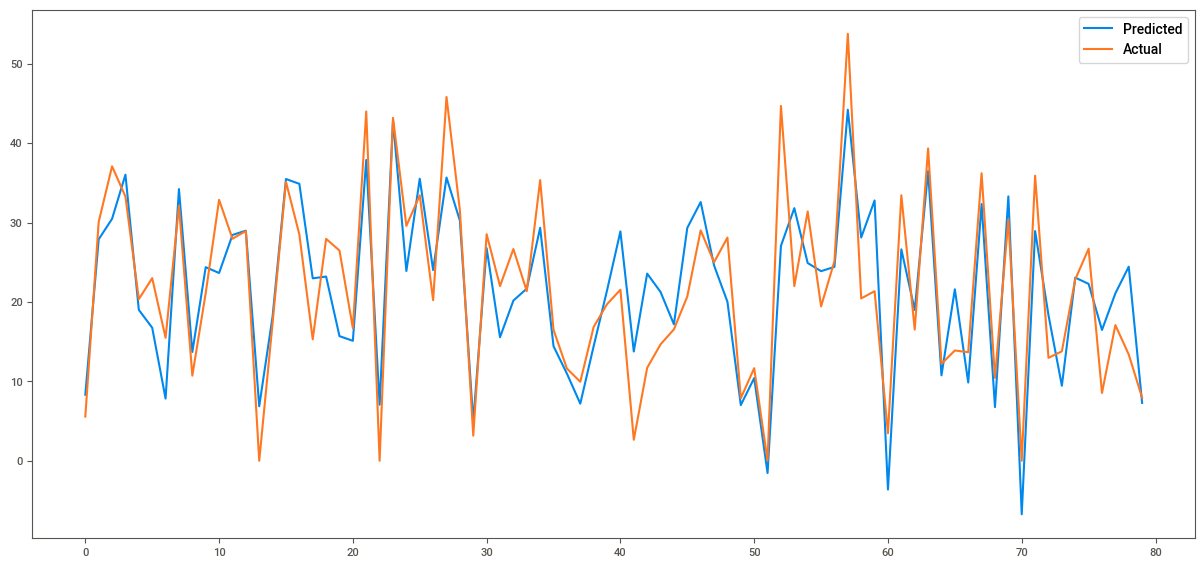

In [79]:
score_metrix(lasso_cv, xtrain_trans, xtest_trans, ytrain, ytest)

##Model (4) -= Ridge regression

Training score  = 0.7358671502026775
The best parameters found out to be :{'alpha': 10} 
where model best score is:  0.7328824117444819 

MAE : 5.062807136059967
MSE : 41.52017837206752
RMSE : 6.443615318442553
R2 : 0.7342928488757146
Adjusted R2 :  0.7299749149050355 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


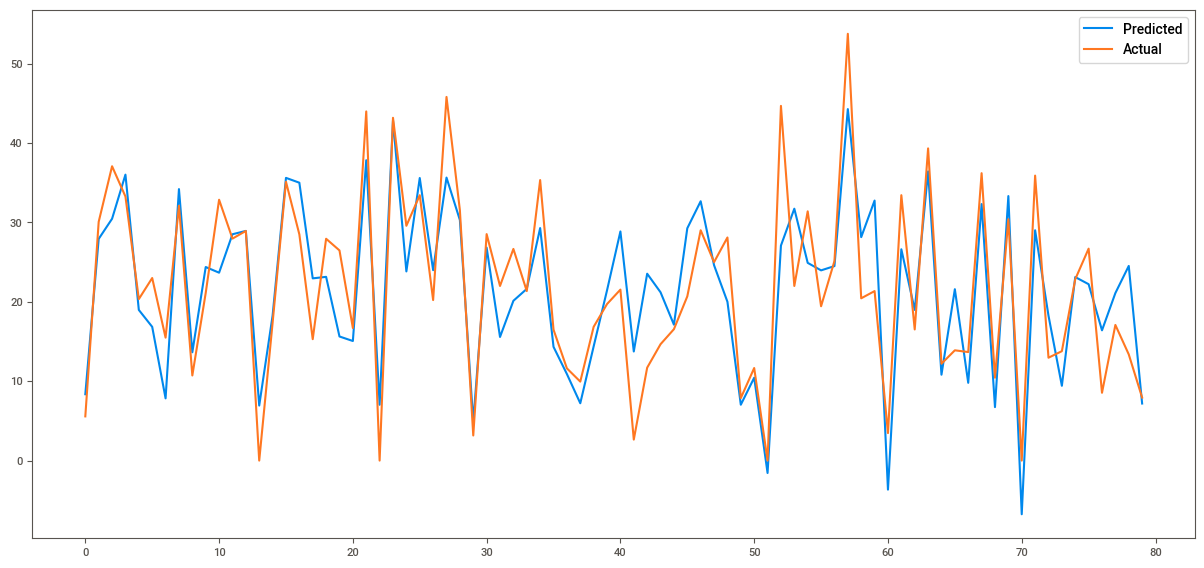

In [80]:
L2 = Ridge() 
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}      # giving parameters 
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=5)                                                                    #using gridsearchcv and cross validate the model
score_metrix(L2_cv,xtrain_trans,xtest_trans,ytrain,ytest)                                                                   # fit and evaluate model with score_matrix function

## Model (5) -= Decission Tree
**bold text**
**Since in decission tree multicollinearity of features does not affect the model accuracy. So in previous models we have removed multicollinear features (such as "Dew Point Temperature")**. 

But here No need to remove that feature. 

So again we define train and test data.

In [81]:
new_x = new_bike_df.drop(columns='Rented Bike Count')                   ### Independent features

new_y = new_bike_df['Rented Bike Count']                                ### Dependent feature

In [82]:
# Spliting data 

new_xtrain, new_xtest, new_ytrain, new_ytest = train_test_split(new_x, new_y, test_size= 0.20, random_state = 10)

In [83]:
new_xtrain.shape,   new_xtest.shape,   new_ytrain.shape,  new_ytest.shape

((7008, 29), (1752, 29), (7008,), (1752,))

In [84]:
# importing decission tree module

from sklearn.tree import DecisionTreeRegressor

In [85]:
# Parameters for Decission Tree model
param_grid = {'criterion' : ["mse"],
              'splitter' : ["best", "random"],
              'max_depth' : [10,15,25, 'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

# using grid search cv 
Dt_grid_search = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,cv=2,n_jobs=-1)

Training score  = 0.815011698329165
The best parameters found out to be :{'criterion': 'mse', 'max_depth': 15, 'max_features': 24, 'min_samples_split': 100, 'splitter': 'best'} 
where model best score is:  0.7628017455589069 

MAE : 205.27914126160096
MSE : 93623.91277816208
RMSE : 305.9802490000982
R2 : 0.7694325722303275
Adjusted R2 :  0.7655496132260763 



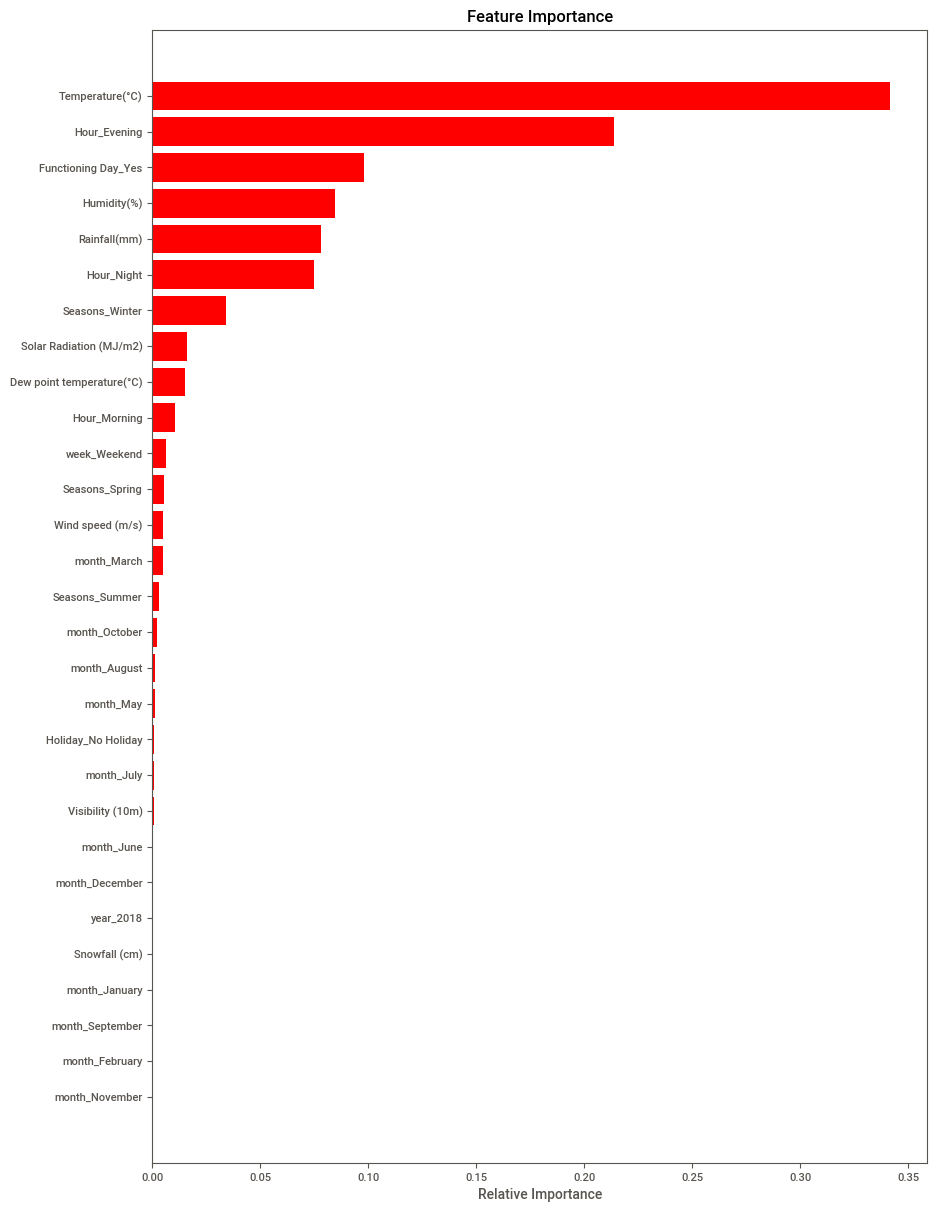

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


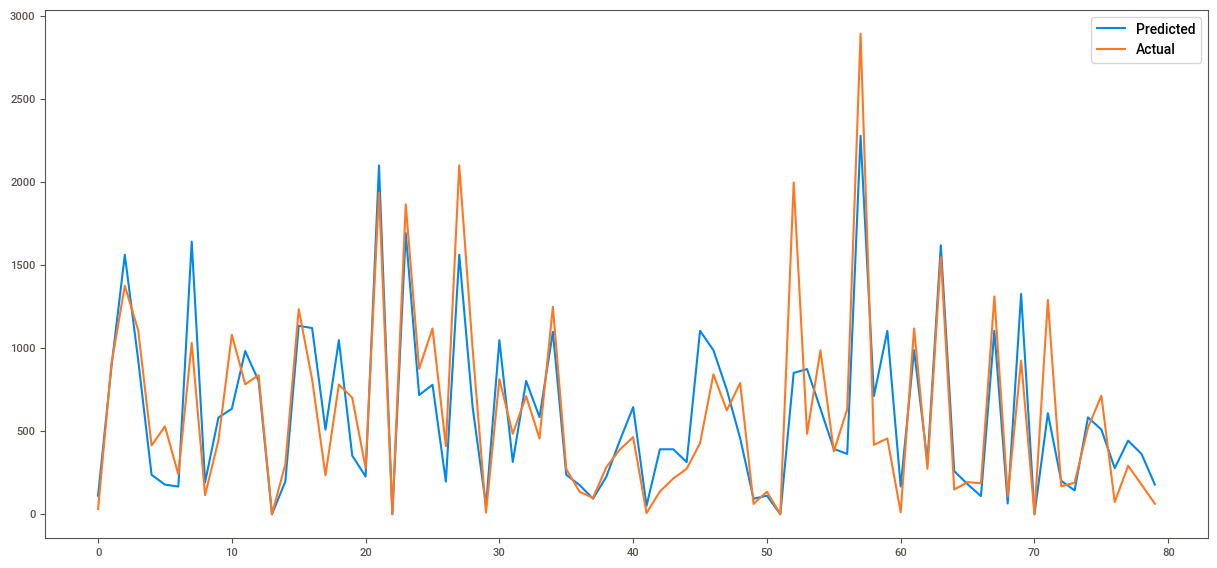

In [86]:
score_metrix(Dt_grid_search, new_xtrain,  new_xtest, new_ytrain,new_ytest)

## Model (6) -= **Random Forest Regression**

In [87]:
# importing library

from sklearn.ensemble import RandomForestRegressor


# parameters for random forest regression model

rf_param_grid ={"n_estimators":[50,100,150],                    ### we can put any values for parameters 
              'max_depth' : [10,15,20,25,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}


# Using grid search cv
Ranom_forest_Grid_search = GridSearchCV(RandomForestRegressor(),param_grid=rf_param_grid,n_jobs=-1,verbose=2)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Training score  = 0.9458669379246406
The best parameters found out to be :{'max_depth': 25, 'max_features': 24, 'min_samples_split': 10, 'n_estimators': 150} 
where model best score is:  0.8358874498856881 

MAE : 163.05959090465572
MSE : 64255.2176672975
RMSE : 253.48612914180828
R2 : 0.841758800516775
Adjusted R2 :  0.8390938790388345 



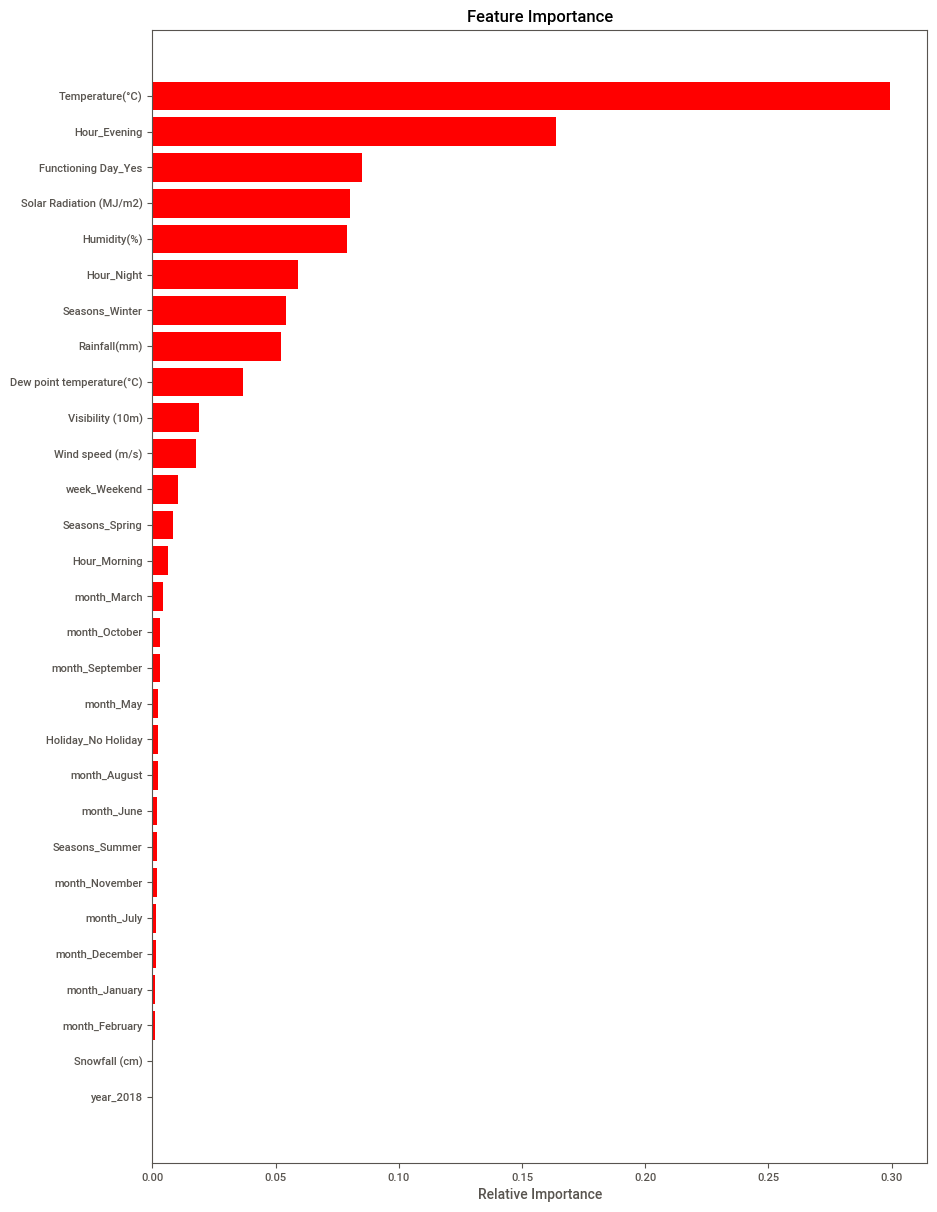

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


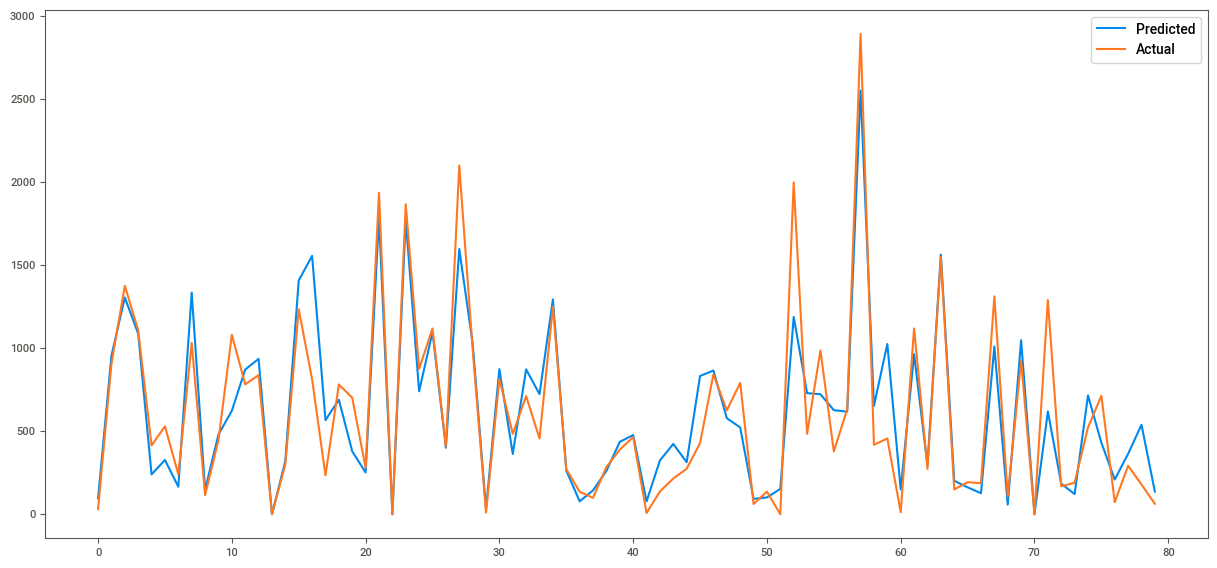

In [88]:
score_metrix(Ranom_forest_Grid_search, new_xtrain, new_xtest, new_ytrain, new_ytest)

## 24) -: **Conclusions of Project :-**

# 1) **EDA** :-

1)- Most number of bikes are rented in the Summer season and the lowest in the winter season.

2)- Over 96% of the bikes are rented on days that are considered as No Holiday.
Most number of bikes are rented in the temperature range of 15 degrees to 30 degrees.

3)- Most number of bikes are rented when there is no snowfall or rainfall.

4)- Majority of the bikes are rented for a humidity percentage range of 30 to 70.

5)- The highest number of bike rentals have been done in the 18th hour, i.e 6pm, and lowest in the 4th hour, i.e 4am.

6)- Most of the bike rentals have been made when there is high visibility.

7)- In 2018 demand for Rented bikes is increased as compare to 2017 year. It may be because in 2017 people are aware about rented bike facility.

#2) **ML models Insights** :-

1)---> **model (1) Linear Regression** :- 

**Evaluation matrices** :- 
                                 
                                  Training score = 0.7031168479271276
                                  MAE : 5.256832985963903
                                  MSE : 44.35376150715583 
                                  RMSE : 6.659861973581422
                                  R2 : 0.7161594175703074
                                  Adjusted R2 :  0.7115468021854953

2)----> Model(2) **LR By polynomial features** :- 

**Evaluation matrices** :- 
                                         
                                  Training score  = 0.8514176478921974
                                  MAE : 3.7037638918076135
                                  MSE : 24.62886174549538
                                  RMSE : 4.962747398920822
                                  R2 : 0.8423883290869492
                                  Adjusted R2 :  0.7902902463763283 

3)-----> **Model (3) Lasso Regression :-** 

**Evaluation matrices :- **             

                                     Training score  = 0.7358435727410344
                                    The best parameters found out to be :{'alpha': 0.01} 
                                     where model best score is:  0.7329299487993713 

                                      MAE : 5.06169849951929
                                      MSE : 41.51236055593674
                                      RMSE : 6.443008657136566
                                      R2 : 0.7343428787583781
                                      Adjusted R2 :  0.7300257578095879 
                                 
                        

4)-----> **Model (4) Ridge Regression** :- 

**Evaluation Matrices** :- 

                         Training score  = 0.7358671502026775
                         The best parameters found out to be :{'alpha': 10} 
                          where model best score is:  0.7328824117444819 

                          MAE : 5.062807136059967
                          MSE : 41.52017837206752
                          RMSE : 6.443615318442553
                          R2 : 0.7342928488757146
                          Adjusted R2 :  0.7299749149050355 

5)----> **Model (5) Decision Tree** :- 

 **Evaluation Matrices** :-
 
                      Training score  = 0.8280441022565106
                      The best parameters found out to be :{'criterion': 'mse', 'max_depth': 10, 'max_features': 24, 'min_samples_split': 50, 'splitter': 'best'} 
                      where model best score is:  0.762736405229868 

                      MAE : 198.53362785980028
                      MSE : 91206.7120267727
                      RMSE : 302.004490077172
                      R2 : 0.7753854078159468
                      Adjusted R2 :  0.771602699817493   


6)----> **Model (6) Random Forest Regression** :-  

**Evaluation Matrices** :-  
   
                   Fitting 5 folds for each of 180 candidates, totalling 900 fits
                  Training score  = 0.9462585885010566
                  The best parameters found out to be :{'max_depth': 25, 'max_features': 24, 'min_samples_split': 10, 'n_estimators': 150} 
                  where model best score is:  0.8368912182495061 

                  MAE : 162.8700295318971
                  MSE : 63993.77680319597
                 RMSE : 252.96991284181598
                 R2 : 0.8424026504239306
                 Adjusted R2 :  0.8397485719467495 

---->>> By Observing Insights of models we can conclude that :-  

1)- Random Forest Regression is the best performing model with an r2 score of 0.842402....

2)- Linear reagression model is the worst performing model with an r2 score of 0.7161594175703074

3) - Actual vs Prediction visualisation is done for all the 6 models.

4)- All 6 models have been explained with the help of feature importance graph.

5)- Temperature and Hour are the two most important factors according to all the models.



**This Notebook is created by Suraj Galande**



**Thank you :)** 
 